## Twitter Data analysis

Project 4 - Part 2 <br>
Gaurav Singh <br>
UID: 305353434 

In [537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import pytz
import gc
import json
from textblob import TextBlob
from datetime import date

# from allennlp.predictors.predictor import Predictor
# import allennlp_models.tagging


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
import nltk
import re
from scipy.signal import find_peaks

from summarizers import Summarizers

import geonamescache
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix


In [261]:
summ = Summarizers('normal')

# https://github.com/salesforce/ctrl-sum

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BartTokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


##### Reading only relevant columns of data to conserve RAM as the files are huge 

In [2]:
basePath = './ECE219_tweet_data/'

In [3]:
pst_tz = pytz.timezone('America/Los_Angeles')

In [4]:
def getAvgTweetsPerHour(data):
    df = pd.DataFrame(data, columns = ['timestamp'])
    grp = df.groupby(pd.Grouper(key = 'timestamp', freq = '60min'))
    return len(data)/ len(grp)

def getAvgRetweet(data):
    return np.mean(data)

def getAvgFollowers(data):
    return np.mean(data)

def getStats(filename):
    date = []
    retweets = []
    followers = []
    for line in open(filename):
        tweet = json.loads(line)
        date.append(datetime.datetime.fromtimestamp(tweet['citation_date']))
        retweets.append(tweet['metrics']['citations']['total'])
        followers.append(tweet['author']['followers'])
    return getAvgTweetsPerHour(date), getAvgFollowers(followers), getAvgRetweet(retweets)

In [5]:
fileGoHawks = os.path.join(basePath, 'tweets_#gohawks.txt')

first, second, third = getStats(fileGoHawks)

print("Average tweets per hour for #goHwaks: ", first)
print("Average no. of followers for user posting tweet #goHwaks: ", second)
print("Average no. of retweets per tweet #goHwaks: ", third)

Average tweets per hour for #goHwaks:  292.09326424870466
Average no. of followers for user posting tweet #goHwaks:  2217.9237355281984
Average no. of retweets per tweet #goHwaks:  2.0132093991319877


In [6]:
fileGopatriots = os.path.join(basePath, 'tweets_#gopatriots.txt')

first, second, third = getStats(fileGopatriots)

print("Average tweets per hour for #gopatriots: ", first)
print("Average no. of followers for user posting tweet #gopatriots: ", second)
print("Average no. of retweets per tweet #gopatriots: ", third)


Average tweets per hour for #gopatriots:  40.888695652173915
Average no. of followers for user posting tweet #gopatriots:  1427.2526051635405
Average no. of retweets per tweet #gopatriots:  1.4081919101697078


In [7]:
filenfl = os.path.join(basePath, 'tweets_#nfl.txt')

first, second, third = getStats(filenfl)

print("Average tweets per hour for #nfl: ", first)
print("Average no. of followers for user posting tweet #nfl: ", second)
print("Average no. of retweets per tweet #nfl: ", third)


Average tweets per hour for #nfl:  396.97103918228277
Average no. of followers for user posting tweet #nfl:  4662.37544523693
Average no. of retweets per tweet #nfl:  1.5344602655543254


In [8]:
filepatriots = os.path.join(basePath, 'tweets_#patriots.txt')

first, second, third = getStats(filepatriots)

print("Average tweets per hour for #patriots: ", first)
print("Average no. of followers for user posting tweet #patriots: ", second)
print("Average no. of retweets per tweet #patriots: ", third)


Average tweets per hour for #patriots:  750.6320272572402
Average no. of followers for user posting tweet #patriots:  3280.4635616550277
Average no. of retweets per tweet #patriots:  1.7852871288476946


In [9]:
filesb49 = os.path.join(basePath, 'tweets_#sb49.txt')

first, second, third = getStats(filesb49)

print("Average tweets per hour for #sb49: ", first)
print("Average no. of followers for user posting tweet #sb49: ", second)
print("Average no. of retweets per tweet #sb49: ", third)


Average tweets per hour for #sb49:  1275.5557461406518
Average no. of followers for user posting tweet #sb49:  10374.160292019487
Average no. of retweets per tweet #sb49:  2.52713444111402


In [10]:
filesuperbowl = os.path.join(basePath, 'tweets_#superbowl.txt')

first, second, third = getStats(filesuperbowl)

print("Average tweets per hour for #superbowl: ", first)
print("Average no. of followers for user posting tweet #superbowl: ", second)
print("Average no. of retweets per tweet #superbowl: ", third)


Average tweets per hour for #superbowl:  2067.824531516184
Average no. of followers for user posting tweet #superbowl:  8814.96799424623
Average no. of retweets per tweet #superbowl:  2.3911895819207736


### Answer 27

Average tweets per hour for #goHwaks:  292.09326424870466 <br>
Average no. of followers for user posting tweet #goHwaks:  2217.9237355281984<br>
Average no. of retweets per tweet #goHwaks:  2.0132093991319877<br>


Average tweets per hour for #gopatriots:  40.888695652173915<br>
Average no. of followers for user posting tweet #gopatriots:  1427.2526051635405<br>
Average no. of retweets per tweet #gopatriots:  1.4081919101697078<br>

Average tweets per hour for #nfl:  396.97103918228277<br>
Average no. of followers for user posting tweet #nfl:  4662.37544523693<br>
Average no. of retweets per tweet #nfl:  1.5344602655543254<br>

Average tweets per hour for #patriots:  750.6320272572402<br>
Average no. of followers for user posting tweet #patriots:  3280.4635616550277<br>
Average no. of retweets per tweet #patriots:  1.7852871288476946<br>

Average tweets per hour for #sb49:  1275.5557461406518<br>
Average no. of followers for user posting tweet #sb49:  10374.160292019487<br>
Average no. of retweets per tweet #sb49:  2.52713444111402<br>

Average tweets per hour for #superbowl:  2067.824531516184<br>
Average no. of followers for user posting tweet #superbowl:  8814.96799424623<br>
Average no. of retweets per tweet #superbowl:  2.3911895819207736<br>

##### Tweets in hour 
- Superbowl
- NFL

### Answer 28

In [63]:
datesSB = []
datesNFL = []

for line in open(filesuperbowl):
    tweet = json.loads(line)
    datesSB.append(tweet['citation_date'])

for line in open(filenfl):
    tweet = json.loads(line)
    datesNFL.append(tweet['citation_date'])


In [104]:
datesSBFrame = pd.DataFrame(sorted(datesSB), columns = ['date'])
datesNFLFrame = pd.DataFrame(sorted(datesNFL), columns = ['date'])

In [105]:
datesSBFrame['date'] = datesSBFrame['date'].apply(lambda x: datetime.datetime.fromtimestamp(x))
datesNFLFrame['date'] = datesNFLFrame['date'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [109]:
datesSBFrame['day'] = datesSBFrame['date'].apply(lambda x: str(x).split(' ')[0].split('-')[2]).astype('int')

datesSBFrame['hour'] = datesSBFrame['date'].apply(lambda x: str(x).split(' ')[1].split(':')[0]).astype('int')

datesNFLFrame['day'] = datesNFLFrame['date'].apply(lambda x: str(x).split(' ')[0].split('-')[2]).astype('int')

datesNFLFrame['hour'] = datesNFLFrame['date'].apply(lambda x: str(x).split(' ')[1].split(':')[0]).astype('int')

In [117]:
# For SB

days = datesSBFrame['day'].to_numpy()
hour = datesSBFrame['hour'].to_numpy()

hrCounts = []
k = 0
while True:
    if k >= len(days):
        break

    j = k
    
    count = 0
    currH = hour[j]
    currD = days[j]
    while j < len(days) and currH == hour[j] and currD == days[j]:
        count+= 1
        j+= 1
        
    k = j
    
    hrCounts.append(count)
    
    if k >= len(days):
        break

Text(0, 0.5, 'Tweets count per hour')

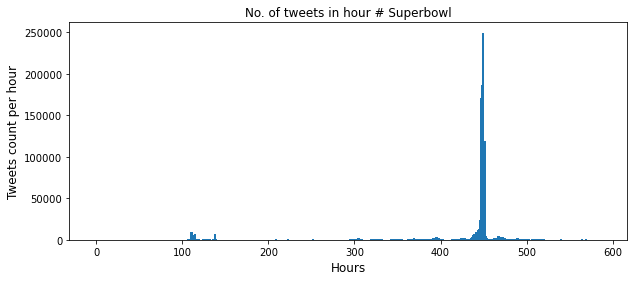

In [147]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)

plt.bar(np.arange(len(hrCounts)), hrCounts, width=3)
plt.title("No. of tweets in hour # Superbowl", size = 12)
plt.xlabel("Hours", size = 12)
plt.ylabel("Tweets count per hour", size = 12)

In [148]:
# For NFL

days = datesNFLFrame['day'].to_numpy()
hour = datesNFLFrame['hour'].to_numpy()

hrCounts = []
k = 0
while True:
    if k >= len(days):
        break

    j = k
    
    count = 0
    currH = hour[j]
    currD = days[j]
    while j < len(days) and currH == hour[j] and currD == days[j]:
        count+= 1
        j+= 1
        
    k = j
    
    hrCounts.append(count)
    
    if k >= len(days):
        break

Text(0, 0.5, 'Tweets count per hour')

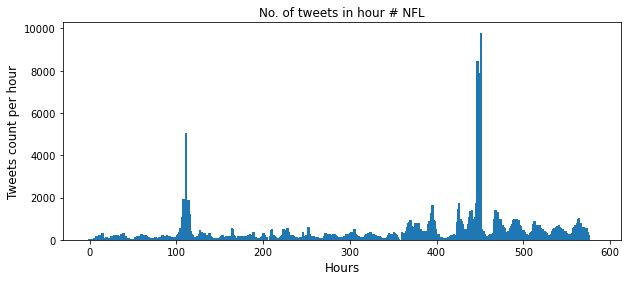

In [149]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)

plt.bar(np.arange(len(hrCounts)), hrCounts, width=3)
plt.title("No. of tweets in hour # NFL", size = 12)
plt.xlabel("Hours", size = 12)
plt.ylabel("Tweets count per hour", size = 12)

## Answer 29

With the given twitter data in hand, I have performed following tasks of interests.

1) Data exploration in terms of Number of tweets by each fanbase before, after and during the super bowl game.

2) Average sentiment trends of each fan base during the game.

3) Finding the important events during the game.

4) Built an overall summary of the game with players contributions and impacts.

5) Fanbase Prediction i.e. given a tweet predicted the state (Washington / Massachusetts) for the fan posting that tweet.

### Patriots Roster

In [5]:
PatriotsRoster = ['Tom Brady', 'Jimmy Garoppolo', 'Shane Vereen', 'LeGarrette Blount', 'Brandon Bolden', 
                  'Jonas Gray', 'James White', 'James Develin', 'Rob Gronkowski', 'Michael Hoomanawanui',
                  'Tim Wright', 'Julian Edelman', 'Brandon LaFell', 'Danny Amendola', 'Josh Boyce',
                  'Matthew Slater', 'Brian Tyms', 'Nate Solder', 'Sebastian Vollmer', 'Jordan Devey', 
                  'Cameron Fleming',
                  'Dan Connolly', 'Marcus Cannon', 'Josh Fline', 'Bryan Stork', 'Ryan Wendell', 'Chandler Jones',
                  'Rob Ninkovich', 
                  'Alan Branch', 'Zach Moore', 'Joe Vellano', 'Vince Wilfork', 'Chris Jones', 'Sealver Siliga',
                  'Jonathan Casillas', 'Jamie Collins', 'Darius Fleming', "Donta Hightower", 'Chris White', 
                  'Akeem Ayers', 'Darrelle Revis', 'Malcolm Butler', 'Brandon Browner',
                  'Kyle Arrington', 'Logan Ryan',
                  'Patrick Chung', 'Devin McCourty', 'Nate Ebner', 'Duron Harmon', 'Tavon Wilson','Stephen Gostkowski',
                  'Ryan Allen', 'Danny Aiken']

hawksRoster = ['Russell Wilson', 'Tarvaris Jackson', 'BJ Daniels', 'Marshawn Lynch', 'Robert Turbin',
               'Christine Michael',
              'Will Tukuafu', 'Luke Wilson', 'Tony Moeaki', 'Cooper Helfet', 'Doug Baldwin', 'Jermaine Kearse', 
               'Ricardo Lockette',
               'Chris Matthews', 'Kevin Norwood', 'Bryan Walters', 'Alvin Bailey', 'Justin Britt', 'Russell Okung', 
               'Lemuel Jeanpierre', 'Keavon Milton', 'JR Sweezy', 'James Carpenter', 'Max Unger', 'Patrick Lewis',
               'Cliff Avril', 'Michael Bennett', 'Demarcus Dobbs', 'David King', "OBrien Schofield",
               'Kevin Williams', 'Tony McDaniel', 'Landon Cohen', 
               'Bruce Irvin', 'KJ Wright', 'Bobby Wagner', 'Malcolm Smith', 'Mike Morgan', 'Brock Coyle',
               'Richard Sherman', 'Byron Maxwell', 'Jeremy Lane', 'DeShawn Shead', 'Tharold Simon', 'Marcus Burley',
               'Earl Thomas', 'Kam Chancellor', 'Steven Terrell', 'Jeron Johnson',
               'Steven Hauschka', 'Jon Ryan', 'Clint Gresham'
              ]


In [6]:
def cleanTweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def getSentiment(tweet):
    analysis = TextBlob(tweet)
    pol = analysis.sentiment.polarity
    sub = analysis.sentiment.subjectivity
    if pol > 0:
        return 1 , pol, sub
    elif pol == 0:
        return 0, pol, sub
    else:
        return -1, pol, sub
    
    
def getSentimentVader(tweet):
    sentiment_dict = sid_obj.polarity_scores(tweet)
    if sentiment_dict['compound'] >= 0.05 :
        return 1
    elif sentiment_dict['compound'] <= - 0.05 :
        return -1
    else :
        return 0

In [10]:
sid_obj = SentimentIntensityAnalyzer()

def createData(filename):
    temp = []
    tweets = []
    regx = r'(?<![@\w])@(\w{1,25})'
    linkreg1 = r"http\S+"
    linkreg2 = r"www.\S+"

    columns = ['citation_date', 'user', 'tweet', 'sentiment', 'retweeted', 'followers_count',
               'friends_count', 'location', 'possibly_sensitive',
              'lang', 'filter_level', 'retweets', 'ranking_score', 'impressions', 'geo', 'lat', 'long', 
               'mentions', 'source', 'hasLink']

    f = open(os.path.join(basePath, filename))
    for line in f:
        t = json.loads(line)

        temp = np.append(temp, t['citation_date'])
        temp = np.append(temp, t['tweet']['user']['id'])

        rawTweet = t['tweet']['text']
        cleaned = cleanTweet(rawTweet)
    
        temp = np.append(temp, cleaned)
        
        level, pol, sub = getSentiment(cleaned)
        
#         temp = np.append(temp, level)
#         temp = np.append(temp, pol)
#         temp = np.append(temp, sub)

#         senti = getSentimentVader(cleaned)
        temp = np.append(temp, level)
        
        temp = np.append(temp, t['tweet']['retweeted'])
        temp = np.append(temp, t['tweet']['user']['followers_count'])
        temp = np.append(temp, t['tweet']['user']['friends_count'])
        
        location = '0'
        if t['tweet']['user']['location']:
            location = t['tweet']['user']['location']

        temp = np.append(temp, location)
        
        
        temp = np.append(temp, t['tweet']['possibly_sensitive'])
        temp = np.append(temp, t['tweet']['lang'])
        temp = np.append(temp, t['tweet']['filter_level'])
        temp = np.append(temp, t['metrics']['citations']['total'])
        temp = np.append(temp, t['metrics']['ranking_score'])
        temp = np.append(temp, t['metrics']['impressions'])
        temp = np.append(temp, t['tweet']['geo'])

        lat = None
        long = None
        if t['tweet']['coordinates']:
            lat = str(t['tweet']['coordinates'][list(t['tweet']['coordinates'].keys())[1]][1])
            long = str(t['tweet']['coordinates'][list(t['tweet']['coordinates'].keys())[1]][0])

        temp = np.append(temp, lat)
        temp = np.append(temp, long)

        menti = re.findall(regx, t['tweet']['text'])
        ment = ','.join(menti)

        temp = np.append(temp, ment)
        src = re.sub("<[^>]*>", "", t['tweet']['source'])
        temp = np.append(temp, src)

        haslink1 = re.findall(linkreg1, t['tweet']['text'])
        haslink2 = re.findall(linkreg2, t['tweet']['text'])
        hasLink = 0

        if len(haslink1) or len(haslink2):
            hasLink = 1

        temp = np.append(temp, hasLink)


        tweets.append(temp)
        temp = []
       
    f.close()
    return pd.DataFrame(tweets, columns=columns)


In [11]:
files = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 
        'tweets_#sb49.txt', 'tweets_#superbowl.txt']


goHawks = createData('tweets_#gohawks.txt')
print("GoHawks")
gopatriots = createData('tweets_#gopatriots.txt')
print("gopatriots")
nfl = createData('tweets_#nfl.txt')
print("nfl")
patriots = createData('tweets_#patriots.txt')
print("patriots")
sb49 = createData('tweets_#sb49.txt')
print("sb49")
superbowl = createData('tweets_#superbowl.txt')

GoHawks
gopatriots
nfl
patriots
sb49


###### Roberta sentiment analysis takes a lot of time to predict the sentiment

In [12]:
print(len(gopatriots))

23511


In [13]:
print(len(goHawks), len(patriots), len(nfl), len(sb49), len(superbowl))

169122 440621 233022 743649 1213813


In [14]:
# Sorting the dataframes by timestamp

goHawks['citation_date'] = pd.to_numeric(goHawks['citation_date']).astype('int')
goHawks = goHawks.sort_values(by = ['citation_date'], ignore_index=True)
goHawks['citation_date'] = goHawks['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))


gopatriots['citation_date'] = pd.to_numeric(gopatriots['citation_date']).astype('int')
gopatriots = gopatriots.sort_values(by = ['citation_date'], ignore_index=True)
gopatriots['citation_date'] = gopatriots['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))


nfl['citation_date'] = pd.to_numeric(nfl['citation_date']).astype('int')
nfl = nfl.sort_values(by = ['citation_date'], ignore_index=True)
nfl['citation_date'] = nfl['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))

patriots['citation_date'] = pd.to_numeric(patriots['citation_date']).astype('int')
patriots = patriots.sort_values(by = ['citation_date'], ignore_index=True)
patriots['citation_date'] = patriots['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))

sb49['citation_date'] = pd.to_numeric(sb49['citation_date']).astype('int')
sb49 = sb49.sort_values(by = ['citation_date'], ignore_index=True)
sb49['citation_date'] = sb49['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))

superbowl['citation_date'] = pd.to_numeric(superbowl['citation_date']).astype('int')
superbowl = superbowl.sort_values(by = ['citation_date'], ignore_index=True)
superbowl['citation_date'] = superbowl['citation_date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pst_tz))



In [22]:
def getDataSplits(data, kickOffTime, endTime):
    firstTweet = data.head(1)['citation_date']
    lastTweet = data.tail(1)['citation_date']
    
    before = int(str(datetime.datetime.fromisoformat(kickOffTime) - firstTweet[0]).split(' ')[0])
    after = int(str(lastTweet[len(data) - 1] - datetime.datetime.fromisoformat(endTime)).split(' ')[0])
    
    inGame = data[(data['citation_date'] >= kickOffTime) & (data['citation_date'] <= endTime)]
    
    beforeGame = data[(data['citation_date'] < kickOffTime)]

    afterGame = data[(data['citation_date'] > endTime)]
    
    return inGame, beforeGame, afterGame, before, after


In [23]:
kickOffTime = '2015-02-01 15:00:00-08:00'
endTime = '2015-02-01 20:00:00-08:00'

inGamegopatriots, beforeGamegopatriots, afterGamegopatriots, b, a = getDataSplits(gopatriots, kickOffTime, endTime)
inGamegohawks, beforeGamegohawks, afterGamegohawks, bb, aa = getDataSplits(goHawks, kickOffTime, endTime)
inGamepatriots, beforeGamepatriots, afterGamepatriots,_,_ = getDataSplits(patriots, kickOffTime, endTime)
inGamenfl, beforeGamenfl, afterGamenfl,_,_ = getDataSplits(nfl, kickOffTime, endTime)
inGamesb49, beforeGamesb49, afterGamesb49,_,_ = getDataSplits(sb49, kickOffTime, endTime)
inGameSB, beforeGameSB, afterGameSB,_,_ = getDataSplits(superbowl, kickOffTime, endTime)

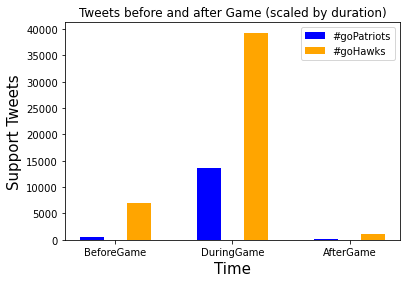

In [24]:
# Comparison of no. of tweets from fanBases

labels = ['BeforeGame', 'DuringGame', 'AfterGame']

width = 0.2
x = np.arange(0, 3)
plt.bar(x - 0.2, [len(beforeGamegopatriots)/ b , 
                  len(inGamegopatriots), len(afterGamegopatriots)/a], width, color='blue')
plt.bar(x + 0.2, [len(beforeGamegohawks)/ bb, 
                  len(inGamegohawks), len(afterGamegohawks)/ aa], width, color='orange')

plt.xticks(x, labels)
plt.xlabel("Time", size = 15)
plt.ylabel("Support Tweets", size = 15)
plt.legend(["#goPatriots", "#goHawks"])
plt.title("Tweets before and after Game (scaled by duration)")
plt.show()

## Part 1: Fanbase volume estimation

For this task I was interested in knowing which team had better fanbase in terms of volume. <br>

For this two files were read:

tweets_#gohawks.txt and tweets_#gopatriots.txt

These files contained tweets which were sent in direct support of respective teams. 

##### The files are quite big and json storage takes a lot of space, thus the files were read one line at a time and only the important fields were processed and stored in corresponding dataframes. 

We know that super bowl games started at <b>'2015-02-01 15:00:00-08:00' and ended at '2015-02-01 20:00:00-08:00' </b>

While the data is being loaded into dataframes, each tweet is processed by removing the hyperlinks, web artifacts, special characters.

After getting the dataframes, the whole data was divided into three parts.

a). Tweets before game i.e all tweets before '2015-02-01 15:00:00-08:00' <br>
b). Tweets during the game i.e all tweets in beteen '2015-02-01 15:00:00-08:00' and '2015-03-01 20:00:00-08:00'<br>
c). Tweets after the game i.e all tweets after '2015-02-01 20:00:00-08:00'<br>

The timestamps were convereted from UNIX timestamps to PST datetime format for convenience of interpretation.

The counts of tweets during the above three time periods are plotted in graph above and the (a) and (b) subgroups are scaled by the number of total days over which those tweets were received for comparison.

Its evident that on game day the total number of tweets surpassed the before game and after game tweets by a huge margin.

Also from the graph we can see that Patriots had a smaller fanbase compared to the hawks fanbase.


In [25]:
def getPlayerTweets(playerName, data):
    tweets = []
    time = []
    senti = []
    
    for index, row in data.iterrows():
        tweet = row['tweet']
        tm = row['citation_date']
        sentiment = row['sentiment']
        
        name = playerName.split(' ')
        a = (' ' + name[0] + ' ').lower()
        b = (' ' + name[0] + ' ').lower()
        c = (' ' + name[1] + ' ').lower()
        d = (' ' + name[1] + ' ').lower()
        e = (name[0]+name[1]).lower()
        if (playerName.lower() in tweet) or (e in tweet):
            tweets.append(tweet)
            time.append(tm)
            senti.append(sentiment)
        else:
            if (a in tweet) or (b in tweet):
                tweets.append(tweet)
                time.append(tm)
                senti.append(sentiment)
            elif (c in tweet) or (d in tweet):
                tweets.append(tweet)
                time.append(tm)
                senti.append(sentiment)
    
    df = pd.DataFrame(
            {'citation_date': time,
             'tweets': tweets,
             'sentiment': senti
            })
    
    return df

##### Vader sentiment analyser and textblob are not working well for this data given that support messages are kept neutral and sports terminologies and sentiments are not understood by it.

### Finding key points during game

In [26]:
pos = ['great', 'goat', 'touchdown', 'love', 'tackle', 'goal', 'amazing', 'score', 'best', 'win', 'big', 'huge',
      'beat', 'yes', 'excited', 'rock', 'nice', 'well', 'play', 'strike', 'good', 'happy', 'yay',
       'enjoy', 'wow', 'beastmode', 'history', 'mvp', 'pass']

neg = ['loser', 'lost', 'defeat', 'bad', 'suck', 'boo', 'need', 'damn', 'lose', 'fail', 'terrible', 'miserable',
      'poor', 'worst', 'angry', 'no', 'please', 'help', 'mad', 'cry', 'shit', 'fuck', 'garbage', 'hell', 'wtf']


In [27]:
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [430]:
stopWords = set.union(set(stopwords.words('English')), set(text.ENGLISH_STOP_WORDS))

def get_pos_tags(nltkTag):
    firstChar = nltkTag[0]
    if firstChar == 'J':
        return wordnet.ADJ
    if firstChar == 'S':
        return wordnet.ADJ_SAT
    if firstChar == 'V':
        return wordnet.VERB
    if firstChar == 'N':
        return wordnet.NOUN
    if firstChar == 'R':
        return wordnet.ADV
    return wordnet.NOUN


def lemmatize(text, stopWords=stopWords):
    tokens = nltk.word_tokenize(text)
    
    temp = [token for token in tokens if token not in stopWords]
    
    tokens = temp
    
    posTags = nltk.pos_tag(tokens)
    tags = [get_pos_tags(w[1]) for w in posTags]
    lemmas = [lemmatizer.lemmatize(tokens[i], tags[i]) for i in range(0, len(tokens))]
    lemmas = ' '.join(lemmas)
    lemmas = re.sub(r'\w*\d\w*', '', lemmas)
    lemmas = re.sub('[.]', '', lemmas)
    lemmas = re.sub(' +', ' ', lemmas).strip()
    return lemmas

def lemmatize2(text, stopWords=stopWords):
    tokens = nltk.word_tokenize(text)
    
    temp = [token for token in tokens if token not in stopWords and not token.isdigit()]
    
    tokens = temp
    
    posTags = nltk.pos_tag(tokens)
    tags = [get_pos_tags(w[1]) for w in posTags]
    lemmas = [lemmatizer.lemmatize(tokens[i], tags[i]) for i in range(0, len(tokens))]
    lemmas = ' '.join(lemmas)
    lemmas = re.sub(r'\w*\d\w*', '', lemmas)
    lemmas = re.sub('[.]', '', lemmas)
    lemmas = re.sub(' +', ' ', lemmas).strip()
    return lemmas


def preprocessNC(sample):
    sample = sample.split('.')
    sample = [lemmatize(sentence) for sentence in sample]
    sample = '.'.join(sample)
    return sample

def preprocess(sample):
    sample = sample.split('.')
    sample = [lemmatize2(sentence) for sentence in sample]
    sample = '.'.join(sample)
    return sample

def vectorizer(min_df = 3):
    return CountVectorizer(preprocessor=preprocessNC, stop_words='english', min_df=min_df)

def vectorizer2(min_df = 3):
    return CountVectorizer(preprocessor=preprocess, stop_words='english', min_df=min_df)

def get_sentiment(data, min_df=3):
    CV = vectorizer(min_df=min_df)
    
    try:
        counts = CV.fit_transform(data).toarray()

        word_dict = dict(enumerate(CV.get_feature_names_out().flatten(), 0))
        word_dict = dict((v, k) for k, v in word_dict.items())
        scores = []
        for i in range(len(data)):
            p = 0
            n = 0
            for pw in pos:
                if pw in word_dict:
                    p+= counts[i][word_dict[pw]]
            for ng in neg:
                if ng in word_dict:
                    n+= counts[i][word_dict[ng]]
            scores.append(np.sign(p - n))

        return np.mean(scores)
    except:
        return 0

#### Taking only english tweets.

In [29]:
inGamegopatriots = inGamegopatriots[inGamegopatriots['lang'] == 'en']
inGamegohawks = inGamegohawks[inGamegohawks['lang'] == 'en']
inGamegopatriots['tweet'] = inGamegopatriots['tweet'].apply(lambda x: x.lower())
inGamegohawks['tweet'] = inGamegohawks['tweet'].apply(lambda x: x.lower())
inGamegopatriots['sentiment'] = inGamegopatriots['sentiment'].astype('int')
inGamegohawks['sentiment'] = inGamegohawks['sentiment'].astype('int')

inGamepatriots = inGamepatriots[inGamepatriots['lang'] == 'en']
inGamenfl = inGamenfl[inGamenfl['lang'] == 'en']
inGamepatriots['tweet'] = inGamepatriots['tweet'].apply(lambda x: x.lower())
inGamenfl['tweet'] = inGamenfl['tweet'].apply(lambda x: x.lower())
inGamepatriots['sentiment'] = inGamepatriots['sentiment'].astype('int')
inGamenfl['sentiment'] = inGamenfl['sentiment'].astype('int')

inGamesb49 = inGamesb49[inGamesb49['lang'] == 'en']
inGameSB = inGameSB[inGameSB['lang'] == 'en']
inGamesb49['tweet'] = inGamesb49['tweet'].apply(lambda x: x.lower())
inGameSB['tweet'] = inGameSB['tweet'].apply(lambda x: x.lower())
inGamesb49['sentiment'] = inGamesb49['sentiment'].astype('int')
inGameSB['sentiment'] = inGameSB['sentiment'].astype('int')

#### Using custom sentiment scores from CountVectorizer

In [30]:
grp1 = inGamegopatriots.groupby(pd.Grouper(key = 'citation_date',
                                           freq = '3min')).apply(lambda x: get_sentiment(x['tweet']))


In [31]:
grp2 = inGamegohawks.groupby(pd.Grouper(key = 'citation_date', 
                                        freq = '3min')).apply(lambda x: get_sentiment(x['tweet']))

In [32]:
duration = ((datetime.datetime.fromisoformat(kickOffTime) - datetime.datetime.fromisoformat(endTime)).seconds)/(3*60)

In [35]:
a = grp1.values
b = grp2.values

Text(0, 0.5, 'Sentiment scores')

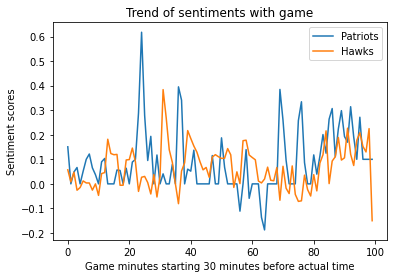

In [36]:
plt.plot(a, label = 'Patriots')
plt.plot(b, label = 'Hawks')
plt.legend()
plt.title("Trend of sentiments with game")
plt.xlabel("Game minutes starting 30 minutes before actual time")
plt.ylabel("Sentiment scores")

In [37]:
grp1 = inGamegopatriots.groupby(pd.Grouper(key = 'citation_date', freq = '3min')).mean()
grp2 = inGamegohawks.groupby(pd.Grouper(key = 'citation_date', freq = '3min')).mean()

##### Using TextBlob as sentiment analyser

Text(0, 0.5, 'Sentiment scores')

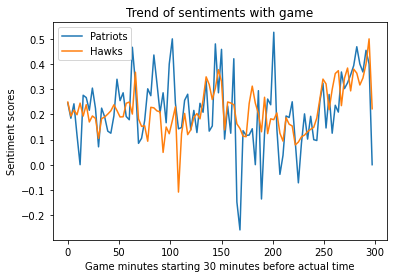

In [38]:
plt.plot(np.arange(0, 300, 3), grp1['sentiment'], label='Patriots')
plt.plot(np.arange(0, 300, 3), grp2['sentiment'], label='Hawks')
plt.legend()
plt.title("Trend of sentiments with game")
plt.xlabel("Game minutes starting 30 minutes before actual time")
plt.ylabel("Sentiment scores")

## Part 2: Average sentiment trends

Sentiments of the fans inferred from the tweets tell a lot about the game and timeline. When there is a sudden drop in the sentiment it means that fans are disappointed due to some event or bad player performance and vice versa.

To analyse the sentiments of the fans, I used two methods one is using TextBlob and other is using a custom built sentiment predictor. 

For the custom built sentiment analyser, I creaeted two groups of words one which is a set of all positive words and other is the set of all negative words. Soccer specific and sports specific words and slangs are also included for better performance. The cleaned in game tweets are grouped in timeperiods of 3 mins. The grouped tweets are then passed through CountVetorizer to get the counts of words in each tweet. Then based on how many positive and negative words are contained by each tweet we calculated the sentiment of that sentence as the mean of difference between the positive and negative counts of wors present in that group.

TextBlob is a Lexicon-based sentiment analyzer It has some predefined rules or we can say word and weight dictionary, where it has some scores that help to calculate a sentence’s polarity. It works on some predefined rules.Clearly it is not a good analyser as it is not able to give good results on some benchmarks where it achieves only 0.55 accuracy. It is not able to pick up the sarcasms, some random negated words can easily break the rules on which it works. But we are using it to just get a comparison and given that we are averaging the sentiments over a window of 3min it works well.

The results of the sentiment analysis done for two fanbases tweets using goPatriots and goHawks are shown above using the custom sentiment analyser and using TextBlob. We can see out custom analyser is not able to pick that many peaks but overall we are seeing that Hawks dominated the sentiment battle for majority of the game and then at the end patriots overcame this battle. And this is true because Patriots actually won the game in the end.

In [343]:
def getSummary(playerName, data, duration, threshold = 0.50):
    series = getPlayerTweets(playerName, data)
    grouped = series.groupby(pd.Grouper(key = 'citation_date', freq = str(duration) + 'min'))
    means = grouped.mean()
    
    if threshold > 0:
        peaks = means[means['sentiment'] >= threshold].index.to_numpy()
    else:
        peaks = means[means['sentiment'] <= threshold].index.to_numpy()
    
    i = 0
    tweets = []
    timeStamps = []
    while i < len(peaks):
        start = peaks[i]
        end = start + datetime.timedelta(minutes = duration)
        i+= 1
        timeStamps.append(start)
        text = series[(series['citation_date'] >= start) & (series['citation_date'] <= end)]['tweets'].to_list()
        tweets.append('. '.join(text))
    
    df = pd.DataFrame(
                {'citation_date': timeStamps,
                 'tweets': tweets,
                 'duration': duration
                })
    return df


def getKeyTweets(data, player):
    tweets = data.split('.')
    player = player.lower()
    
    text = []
    for tw in tweets:
        name = player.split(' ')
        a = (' ' + name[0] + ' ').lower()
        b = (' ' + name[0] + ' ').lower()
        c = (' ' + name[1] + ' ').lower()
        d = (' ' + name[1] + ' ').lower()
        e = (name[0]+name[1]).lower()
        if (player.lower() in tw) or (e in tw):
            text.append(tw)
        else:
            if (a in tw) or (b in tw):
                text.append(tw)
            elif (c in tw) or (d in tw):
                text.append(tw)
    
    if len(text) > 30:
        text = np.random.choice(text, 30, replace=False)
     
    summary = []
    indices = np.arange(0, len(text), 10)
    for i in range(len(indices)):
        start = indices[i]
        end = indices[i] + 10
        content = '. '.join(text[start : end])
        summary.append(summ(content))
    
    return '. '.join(summary)


#### Plotting the number of tweets encountered as per given duration of game

In [294]:
def plotVariations(data, duration, title, xlab, ylab):
    frequency = str(duration) + 'min'
    
    keys = data[['citation_date', 'location']].groupby(
        pd.Grouper(key = 'citation_date', freq = str(duration) + 'min')).count()['location'].to_numpy()
    
    total = (data['citation_date'].to_numpy()[-1] - data['citation_date'].to_numpy()[0])
    rang = (total.seconds / (60))
    x = np.arange(0, rang, duration)
    plt.plot(x, keys)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()
    
def getPeaks(data, duration, title, xlab, ylab, pThresh):
    frequency = str(duration) + 'min'
    
    timestamps = data[['citation_date', 'location']].groupby(
        pd.Grouper(key = 'citation_date', freq = str(duration) + 'min')).count().index.to_numpy()

    keys = data[['citation_date', 'location']].groupby(
        pd.Grouper(key = 'citation_date', freq = str(duration) + 'min')).count()['location'].to_numpy()
    
    peaks, _ = find_peaks(keys, height=0, threshold=pThresh)
    
    total = (data['citation_date'].to_numpy()[-1] - data['citation_date'].to_numpy()[0])
    rang = np.ceil(total.seconds / (60))
    x = np.arange(0, rang, duration)
    plt.plot(x, keys)
    plt.plot(peaks*duration, keys[peaks], "x", color='r')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()
    
    tweets = []
    for peak in peaks:
        ts = timestamps[peak]
        
        start = ts
        end = start + datetime.timedelta(minutes = duration)
        text = data[(data['citation_date'] >= start) & (data['citation_date'] <= end)]['tweet'].to_list()
        tweets.append('. '.join(text))
    
    return peaks, timestamps[peaks], tweets

def getAssociatedPlayers(keyData, roster):
    keyPoints = len(keyData)
    
    counts = {}
    for player in roster:
        player = player.lower()
        counts[player] = 0
        name = player.split(' ')
        a = (' ' + name[0] + ' ').lower()
        b = (' ' + name[0] + ' ').lower()
        c = (' ' + name[1] + ' ').lower()
        d = (' ' + name[1] + ' ').lower()
        e = (name[0]+name[1]).lower()
        
        temp = keyData
        counts[player]+= len(re.findall(player, temp))
        temp = re.sub(player, '', temp)
        
        counts[player]+= len(re.findall(a, temp))
        temp = re.sub(a, '', temp)
        
        counts[player]+= len(re.findall(b, temp))
        temp = re.sub(b, '', temp)
        
        counts[player]+= len(re.findall(c, temp))
        temp = re.sub(c, '', temp)
        
        counts[player]+= len(re.findall(d, temp))
        temp = re.sub(d, '', temp)
        
        counts[player]+= len(re.findall(e, temp))
        temp = re.sub(e, '', temp)
    
    counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
    return counts

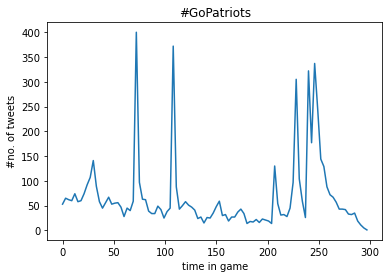

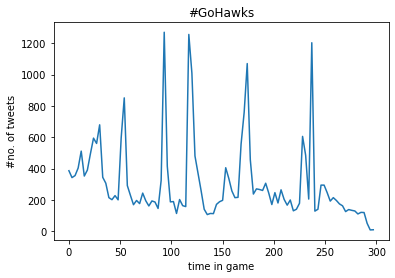

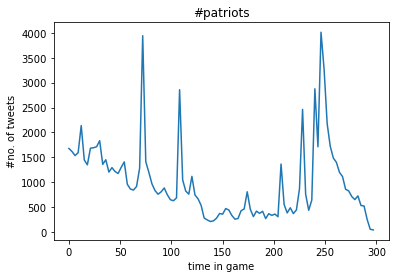

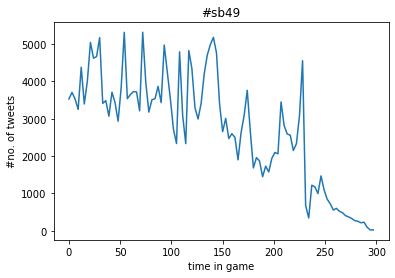

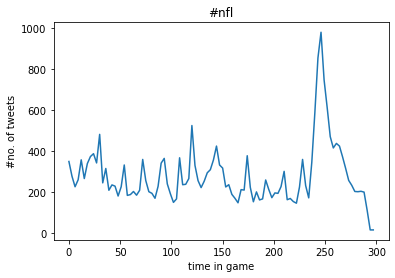

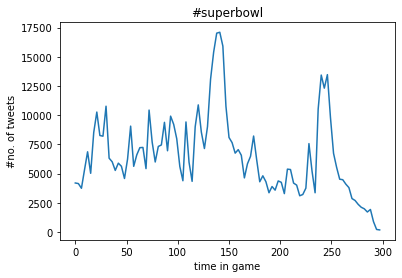

In [91]:
plotVariations(inGamegopatriots, 3, "#GoPatriots", "time in game", "#no. of tweets")

plotVariations(inGamegohawks, 3, "#GoHawks", "time in game", "#no. of tweets")

plotVariations(inGamepatriots, 3, "#patriots", "time in game", "#no. of tweets")

plotVariations(inGamesb49, 3, "#sb49", "time in game", "#no. of tweets")

plotVariations(inGamenfl, 3, "#nfl", "time in game", "#no. of tweets")

plotVariations(inGameSB, 3, "#superbowl", "time in game", "#no. of tweets")

#### Peak Identification 

##### For goPatriots

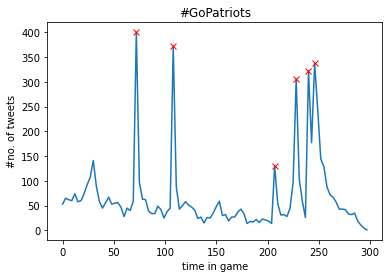

In [196]:
peaksgoPatriots, tsgopatriots, twgp = getPeaks(inGamegopatriots, 3,
                                                 "#GoPatriots", "time in game", "#no. of tweets", 50)

##### For goHawks

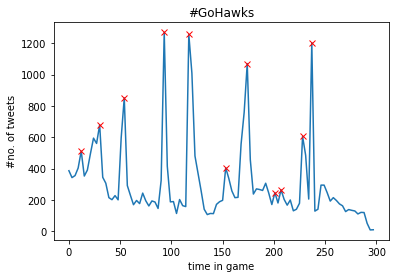

In [197]:
peaksgoHawks, tsgohawks, twgh = getPeaks(inGamegohawks, 3, "#GoHawks", "time in game", "#no. of tweets", 50)

##### For superbowl

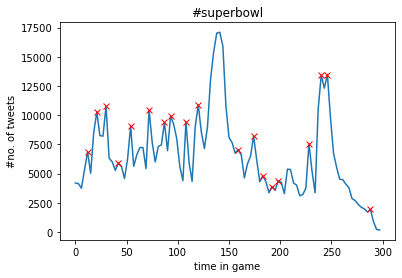

In [198]:
peakssb, tssb, twsb = getPeaks(inGameSB, 3, "#superbowl", "time in game", "#no. of tweets", 100)

## Part 3 : Finding the important events in the game.

The number of tweets during the game gives an idea about the key events. With something interesting happening in game the number of tweets should go up. And thus for all the 6 files(hashtags) I plotted the number of tweets sent in intervals of 3min. The peaks correspond to the key events. The plots are shown above.

One observation is that the peaks of #gopatriots and #gohawks are not occuring at the same time. This means one event which is a positive outcome for one fanbase is a bad event for the other fanbase.

I focussed on three hashtage - #gopatriots, #gohawks and #superbowl.
The peaks are identified using scipy's find_peaks from signal processing module. We considered the important events which saw an increase in tweets by a count of 100 compared to its neighbouring time slots. The important events are marked in red as plots above.

A total of 7 keyevents for gopatriots, 11 for gohawks and 25 for superbowl tweets are observed.

# Part 4

For this part, I first collected the playing roster for both of the teams from :
https://www.sbnation.com/nfl/2015/2/1/7957703/super-bowl-rosters-2015-seahawks-patriots

Then, for each of the three hashtags i.e gopatriots, gohawkss and superbowl, corresponding to each key event which is found above, we computed the key players which were mentioned during that event. All the events are of 3 minute duration. To get the mentions a regex on names and its variation is written. The top 5 players with most number of tweets are chosen and the tweets corresponding to that player were stored and processed. 

This helps in identifying the players which were in limelight during all the key moments of the game and give us the idea of what they actually did during that time.

To analyse the tweets better, given that each player's tweets can go very high, I used a summarizer from Salesforce.

https://github.com/hyunwoongko/summarizers

The summarization is based on https://arxiv.org/abs/2012.04281 paper . It uses pretrained BART (denoising autoencoder for pretraining sequence-to-sequence models) along with control tokens as inputs to get customised outputs.

The tweets corresponding to each important player in the identified key point is then shortened by randomly choosing 30 tweets which are then grouped into groups of 10 and passed to the summarizer to get a shortened summary which is then appended to the other summaries. 

I did this on three hashtags so as to gain different perspectives two supportive(#gohawks, #gopatriots) and one neutral (#superbowl).

<b>The results are quite good as we almost get the whole import events in the game with most important players involded in that key event an their contributions with scorelines and MVP results. All the results are given below. </b>

## Part 4 - Getting summary of the game using peaks from Patriots fans perspective

##### Associated players with keypoints

- For #goPatriots

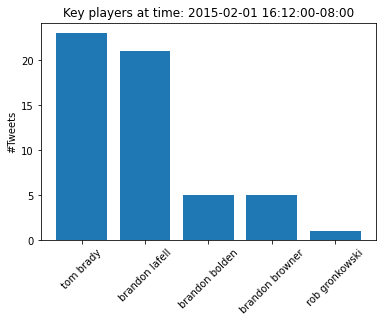


----- Summary of tweets for given Key moment for tom brady ---- 
 
If you aren t pulling for tom brady tonight you re blind gopatriots.. The difference between tom brady and other nfl quarterbacks is that he throws a red zone interception and it doesn t phase him at all.. Brady s interception was only part of his master plan gopatriots.

----- Summary of tweets for given Key moment for brandon lafell ---- 
 
touchdown go patriots my boy lafell doyourjob gopatriots.  touchdown brandon lafell que passe do brady Gopatriots gobrady espntemsuperbowl49.. Whoohoo lafell sb49 gopatriots.  pats strike first lafell td 7 0 pats gopatriOTS superbowlxlix.. edelman, gronkowski, lafell and brady are gonna dominate this game.

----- Summary of tweets for given Key moment for brandon bolden ---- 
 
Gopatriots.  touchdown brandon lafell gopatriots grande tom brady sb49.

----- Summary of tweets for given Key moment for brandon browner ---- 
 
Gopatriots.  touchdown brandon lafell gopatriots grande tom 

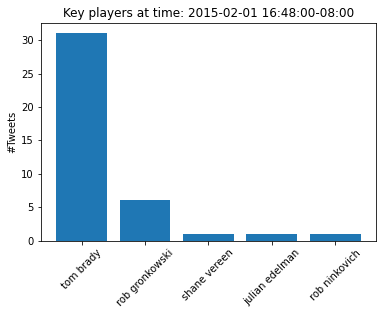


----- Summary of tweets for given Key moment for tom brady ---- 
 
tombrady brady 12 gopatriots usa.  brady to gronk for the td gopatriot.  touchdown again let s go patriots.. Tom brady s doing good gopatriots.  awesome pass from tom brady touchfuckingdoooown. patriots 14 7 seattle superbowl.. Gopatriots.  touchdown patriots tombrady assure superbowl superbowlxlix.  brady is doting these seahawks up ahah great work gronk gopatriot.  1 tom brady gopatriots.

----- Summary of tweets for given Key moment for rob gronkowski ---- 
 
There he is my boy gronkowski gronkanator spike nfl sb49 superbowlxlix.

----- Summary of tweets for given Key moment for shane vereen ---- 
 
"If you run it it vereen score us a touchdown highschoolflashbacks gopatriots"

----- Summary of tweets for given Key moment for julian edelman ---- 
 
"Gronk, gronk, amp edelman are on fire tonight superbowlxlix gopatriots"

----- Summary of tweets for given Key moment for rob ninkovich ---- 
 
rob gronkowski just score

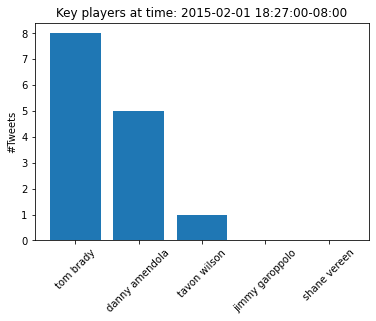


----- Summary of tweets for given Key moment for tom brady ---- 
 
Tom brady gopatriots. be terrific.

----- Summary of tweets for given Key moment for danny amendola ---- 
 
Gopatriots.  at last touchdown amendola gopatriots superbowl.  thank christ amendola patriots gopatriot superbowlxlix.

----- Summary of tweets for given Key moment for tavon wilson ---- 
 
c'mon pats d bury wilson on this next drive gopatriots.

----- Summary of tweets for given Key moment for jimmy garoppolo ---- 
 


----- Summary of tweets for given Key moment for shane vereen ---- 
 



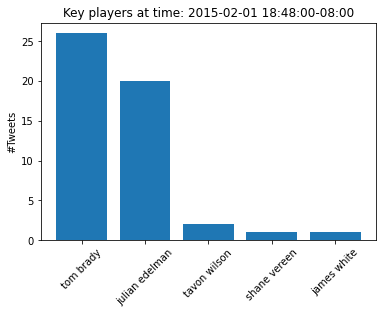


----- Summary of tweets for given Key moment for tom brady ---- 
 
Gopatriots.  espntemsuperbowl49 big brady boy doyourjob gopatriots gopats.. Brady is on top again teambrady gopatriots.  superbowlxlix. touchdooooown grande brady gopats gopatriot superbowl.. Sb49: "Go brady boy, go brady boy" "I love brady amp edelman"

----- Summary of tweets for given Key moment for julian edelman ---- 
 
Edelman scores touchdown gopatriots superbowlxlix.  yes julian with the touchdown what concussion gopatriot superbowl.  touchdownnnnnnn yes brady edelman you legend come on new england you can do it 28 24 Gopatriots teambrady.. "Brady edelman touchdown. edelman we got the lead"

----- Summary of tweets for given Key moment for tavon wilson ---- 
 
i just can t take all the cheesy russell wilson quotes.

----- Summary of tweets for given Key moment for shane vereen ---- 
 
"The touchdown gopatriots amendola edelman vereen brady"

----- Summary of tweets for given Key moment for james white ---- 
 
y

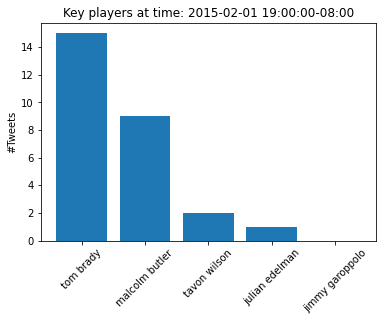


----- Summary of tweets for given Key moment for tom brady ---- 
 
tom brady wins 4th super bowl ring gopatriots superbowlchampions. tom brady shows respect for mvp by winning 4th ring.. There's so much screaming go pats finishthejob.

----- Summary of tweets for given Key moment for malcolm butler ---- 
 
Gopatriots.  butler intercepting the pass that will ultimatly lead to the patriots winning superbowl.

----- Summary of tweets for given Key moment for tavon wilson ---- 
 
"That s not sweat running down your face wilson that s tears sad day seachickens thank you butler gopatriots patriotsvsseahawks"

----- Summary of tweets for given Key moment for julian edelman ---- 
 
julianedelman gopats gopatriots newengland. My husband and I live in New England.

----- Summary of tweets for given Key moment for jimmy garoppolo ---- 
 



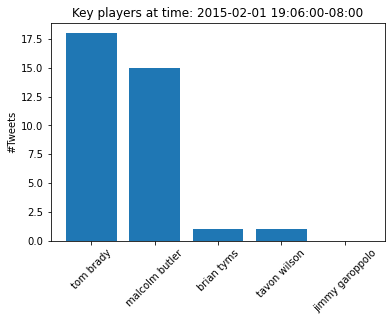


----- Summary of tweets for given Key moment for tom brady ---- 
 
Gopatriots. go pats pats go pats. amen brady. patriots4thring.. yeeeeeeeah brady! superbowl49 gopatriots champions.

----- Summary of tweets for given Key moment for malcolm butler ---- 
 
Butler with the clutch interception holyballsermergerd go patriotsssssss superbowl champions sbxlix gopatriots patriotsnation.  butler for the win superbowlxlix. 28-24.. malcolm butler is adorable i had a vision that i was gunna make a big play correction the biggest play gopatriots superbowi. so mal Malcolm butler is a psychic cool beans hehadavision gopatriot superbowl.

----- Summary of tweets for given Key moment for brian tyms ---- 
 
i know who my prophet is and it ain't lololol prophet brian its over gopatriots.

----- Summary of tweets for given Key moment for tavon wilson ---- 
 
Why wilson never gave lynch the ball for seattle i will never know.

----- Summary of tweets for given Key moment for jimmy garoppolo ---- 
 



In [347]:
keyTimesGP = tsgopatriots
keyTimesGH = tsgohawks
keyTimesSB = tssb


for id, tw in enumerate(twgp):
    mp = getAssociatedPlayers(tw, PatriotsRoster)
    top = list(mp.keys())[0:5]
    
    values = []
    for tp in top:
        values.append(mp[tp])
    
    plt.bar(top, values)
    plt.xticks(rotation = 45)
    plt.title("Key players at time: {}". format(keyTimesGP[id]))
    plt.ylabel("#Tweets")
    plt.show()
    
    for tp in top:
        print("\n----- Summary of tweets for given Key moment for {} ---- \n ".format(tp))
        print(getKeyTweets(tw, tp))
        

## Part 4 - Getting summary of the game using peaks from Hawks fans perspective

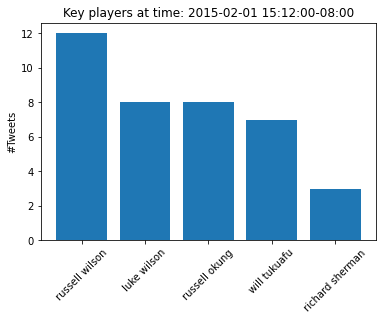


----- Summary of tweets for given Key moment for russell wilson ---- 
 
i m so glad that they didn t try to replicate the kurt russell intro from last year that was so good so special superbowlxlix gohawks.. gohawks sb49 is my pick to win the championship. I pick russell mvp and patriots 2 turnovers with fully inflated balls gohawks championshipmindset.

----- Summary of tweets for given Key moment for luke wilson ---- 
 
i don t like either teams billsmafia but russell wilson is the fricken man gohawks.  if brady win this one he s the truth automatic hall of fame.

----- Summary of tweets for given Key moment for russell okung ---- 
 
i m so glad that they didn t try to replicate the kurt russell intro from last year that was so good so special superbowlxlix gohawks.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
My man russell wilson will win the gohawks superbowl49.

----- Summary of tweets for given Key moment for richard sherman ---- 
 
i m wearing my rich

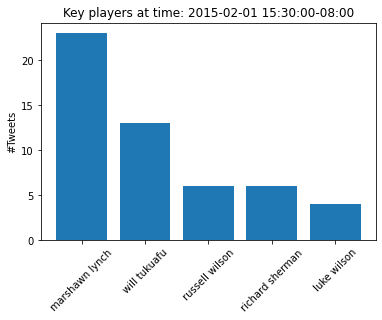


----- Summary of tweets for given Key moment for marshawn lynch ---- 
 
marshawn lynch eating skittles currently gohawks sb49.. You ain't gotta score to grab your nuts marshawn lynch gohawks.. How many super fans send marshawn lynch skittles superbowlxlix gohawks.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
Show us your hawks pride post your pic and we will pick a winner for a hawksbouquet gohawks.  as long as i have a pulse the nationalanthem will choke me up superbowlxlix. i will tweet touchdown a lot even when i m entirely wrong don t care touchdown gohawks.. The coin has been tossed superbowlcroatia will go 2 coach carroll gohawks superbowl hr.

----- Summary of tweets for given Key moment for russell wilson ---- 
 
"Let s go lob gohawks.  hustle like russell gohawks"

----- Summary of tweets for given Key moment for richard sherman ---- 
 
It s time for marshawn and sherman to feast gohawks.

----- Summary of tweets for given Key moment for luke wilson 

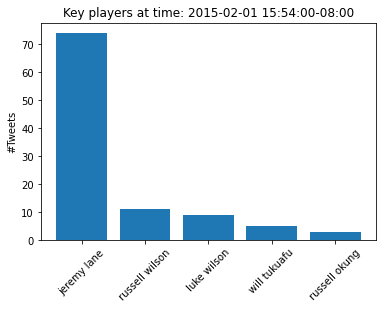


----- Summary of tweets for given Key moment for jeremy lane ---- 
 
A great pick by lane hopefully he s not hurt too bad.. oh hi tom have you met jeremy lane yea that s him the one with your ball touchdown hopes deflated lob.. Huge interception in the end zone jeremy lane picks off brady in the endzone gohawks lob sb49.

----- Summary of tweets for given Key moment for russell wilson ---- 
 
i can t root against russell wilson gohawks.  yes interception gohawks wilson superbowlxlix cheering from browning montana seavsne.

----- Summary of tweets for given Key moment for luke wilson ---- 
 
i can t root against russell wilson gohawks.  yes interception gohawks wilson superbowlxlix cheering from browning montana seavsne.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
tom brady will throw at least three more interceptions tonight gohawks.

----- Summary of tweets for given Key moment for russell okung ---- 
 
i can t root against russell wilson gohawks.  honestly

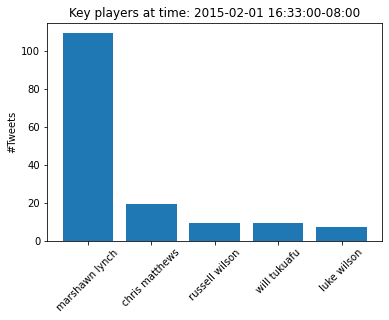


----- Summary of tweets for given Key moment for marshawn lynch ---- 
 
marshawn lynch with the 3 yard td to tie it 7 7 beastmode marshawnlynch gohawks.. marshawn lynch with the tuddy superbowl wherestheskittles 12s gohawks.  touchdown for thx lynch beastmode gohawks.. The Seahawks opened the skittles and lynch takes the ball in the endzone. lynch gohawks sb49.

----- Summary of tweets for given Key moment for chris matthews ---- 
 
matthews makes a huge catch in the second quarter against Green Bay.. "Yeah baby you know why i'm here superbowlxlix gohawks touchdown eat that fuckthepatriots.  way to go chris matthews bbn gohawks sb49.  russellwilson chrismatthews beastmode yeah baby"

----- Summary of tweets for given Key moment for russell wilson ---- 
 
Got off work in time and now rocking my wilson jersey gohawks.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
feed the beast and he will score gohawks.

----- Summary of tweets for given Key moment for luke wil

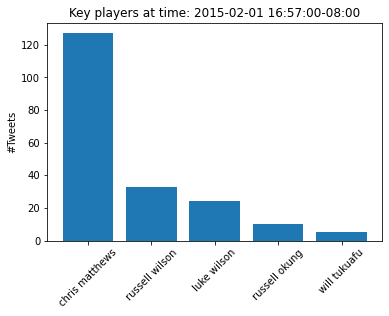


----- Summary of tweets for given Key moment for chris matthews ---- 
 
chris matthews is amazing gohawks sb49.  matthews damn this guy right gohawks.  touchdown.. Chris matthews is our hero great call b3lieve 12s gohawks.. chris matthews for the touchdown with 6 seconds left in the half.

----- Summary of tweets for given Key moment for russell wilson ---- 
 
russell wilson is the truth gohawks russellwilson superbowlxlix.. lynch wilson answers brady touuuuuuuchdown seaaaaaahawks gohawks sb49.  wilson to matthews td seahawks.  lol russell wilson has like 4 completions all game and he throws a td at an almost impossible moment gohawks.. Russel wilson to mathews again but a td this time.

----- Summary of tweets for given Key moment for luke wilson ---- 
 
here s hoping but not liking this call gohawks wilson superbowi.. russell wilson is a baller prime time awesome gohawks.  wilson to matthews for 6 tied at 14 tied at 14. wilson to mathews again but a td this time gohawks. gohawks. sb

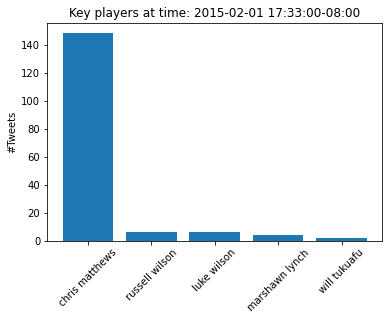


----- Summary of tweets for given Key moment for chris matthews ---- 
 
sb49. are you kidding me chris matthews the unsung hero with another marvelous catch.. chris matthews where have you been all my life gohawks.. chris matthews where were you before holy shit gohawks nevssea  per bill bel Belichick it s a players game that s right.

----- Summary of tweets for given Key moment for russell wilson ---- 
 
Did russell wilson actually shower at halftime not a bad idea gohawks.

----- Summary of tweets for given Key moment for luke wilson ---- 
 
Did russell wilson actually shower at halftime not a bad idea gohawks.

----- Summary of tweets for given Key moment for marshawn lynch ---- 
 
marshawn lynch 3 yard touchdown run.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
patriots may have struck first but seahawks will strike last.


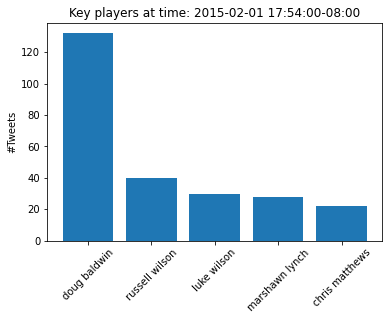


----- Summary of tweets for given Key moment for doug baldwin ---- 
 
"I guess doug baldwin is iight huh deon". Gohawks legionofboom.  touchdown doug baldwin gohawks sb49.  my favorite baldwin sbxlix gohawks.. baldwin capitalizes on the pick superbowlxlix superbowl sb49 nfl gohawks goseahawks.  touchdown seahawks wilson to baldwin for 6 24 14 in the 3rd gohawks. angry doug baldwin gohawks sb49.  touchdown doug hawks gohawks 89

----- Summary of tweets for given Key moment for russell wilson ---- 
 
russell wilson just playing leap frogger like a damn pro.. yeeesss doug baldwin has a great run amp a lovely little pass from wilson gohawks.. "Boom boom boom russell wilson you sir are a legend"

----- Summary of tweets for given Key moment for luke wilson ---- 
 
everydayhesrusselin rt first name russell last name wilson.. russell wilson to doug baldwin sb49 superbowl gohawks.  wilson to baldwin another hawks touchdown due to lynch s running beastmode ultimatesb go Hawks.  nice play by wi

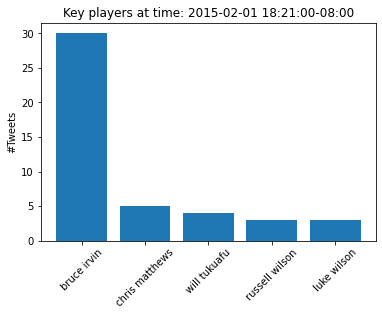


----- Summary of tweets for given Key moment for bruce irvin ---- 
 
What up bruce gohawks.  irvin with the sackarooskie gohawks superbowl2015.. irvin is the first to sack brady gohawks sb49.. bruce irvin with twerked before that sack gohawks sbxlix.  irvin has shown up so big this year just another time on the biggest stage superbowl gohawks.

----- Summary of tweets for given Key moment for chris matthews ---- 
 
Check out chris matthews for the seahawks gohawks sb49.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
nflrookie will you unleash beastmode this monday raw sb49 gohawks.

----- Summary of tweets for given Key moment for russell wilson ---- 
 
i would like to see a 99 wilson or baldwin ultimatesb wilson gohawks.

----- Summary of tweets for given Key moment for luke wilson ---- 
 
i would like to see a 99 wilson or baldwin ultimatesb wilson gohawks.


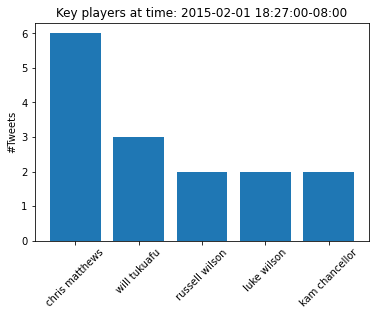


----- Summary of tweets for given Key moment for chris matthews ---- 
 
msnbc s chris matthews praises seahawks via gohawks sb49.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
i would like to order an interception now please i will take it to go gohawks superbowl.

----- Summary of tweets for given Key moment for russell wilson ---- 
 
It's up to russell wilson to win this for the seahawks now gohawks.

----- Summary of tweets for given Key moment for luke wilson ---- 
 
It's up to russell wilson to win this for the seahawks now gohawks.

----- Summary of tweets for given Key moment for kam chancellor ---- 
 
kam almost jumped there gohawks.  chancellor get after it gohawks sb49.


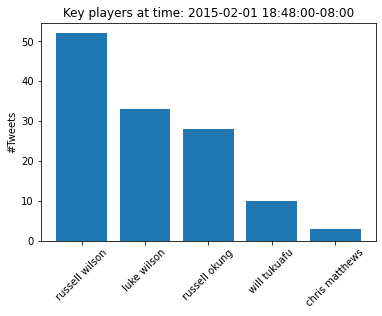


----- Summary of tweets for given Key moment for russell wilson ---- 
 
russell wilson is made for this gohawks.. A solid drive and the take the lead who s ready for some russell wilson late game magic.. Russell wilson has a chance to win his new contract with the Seattle Seahawks.

----- Summary of tweets for given Key moment for luke wilson ---- 
 
"I ain t even worried bout it my boy wilson bout to get nasty on um gohawks.  alright wilson time to win this game gohawks nevssea hawks wilson sb49smchat gohawks". cmon wilson gohawks.  time for wilson to work his magical blessings.. My dad i don t think he s got it about wilson ma he better go take a dump and get back in it.

----- Summary of tweets for given Key moment for russell okung ---- 
 
russell wilson visits seattle children s hospital every tuesday to meet patients.. in russell we trust sb49 q13fox.. russell wilson any relation to bridgitte superbowl gohawks.

----- Summary of tweets for given Key moment for will tukuafu ---- 

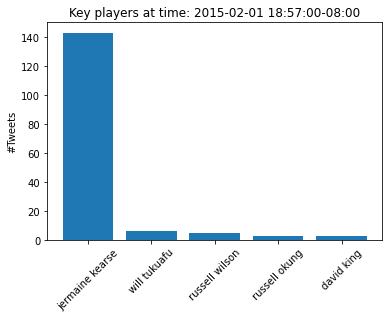


----- Summary of tweets for given Key moment for jermaine kearse ---- 
 
" kearse for president concetration gohawks.  kearse what a catch". " kearse gohawks.  that catch by kearse will go down in history gohawks superbowlxlix.  wow kearse got hands". kearse will you marry me 1 5 unbelievable gohawks.  superbowlxlix.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
That catch by kearse will go down in history gohawks superbowlxlix.

----- Summary of tweets for given Key moment for russell wilson ---- 
 
gohawks baby12 goseahawks superbowl49 liveonkmtr.

----- Summary of tweets for given Key moment for russell okung ---- 
 
come on russell you got this first down gohawks baby12 goseahawks superbowl49 liveonkmtr.  ok now get in there russell gohawks.

----- Summary of tweets for given Key moment for david king ---- 
 
i just shit my pants sick catch lmao david tyree manningham kearse patriots are sick.


In [348]:
keyTimesGP = tsgopatriots
keyTimesGH = tsgohawks
keyTimesSB = tssb


for id, tw in enumerate(twgh):
    mp = getAssociatedPlayers(tw, hawksRoster)
    top = list(mp.keys())[0:5]
    
    values = []
    for tp in top:
        values.append(mp[tp])
    
    plt.bar(top, values)
    plt.xticks(rotation = 45)
    plt.title("Key players at time: {}". format(keyTimesGH[id]))
    plt.ylabel("#Tweets")
    plt.show()
    
    for tp in top:
        print("\n----- Summary of tweets for given Key moment for {} ---- \n ".format(tp))
        print(getKeyTweets(tw, tp))
        
    

## Part 4 - Getting overall summary of the game at different keypoints

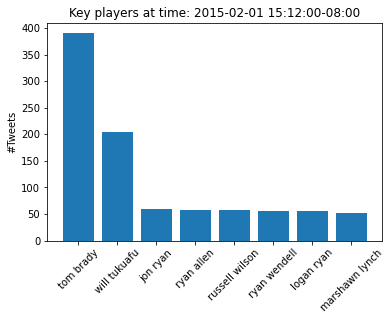


----- Summary of tweets for given Key moment for tom brady ---- 
 
The Patriots take on the Falcons in Sunday night's superbowl.. 4th ring for brady on the way patsnation superbowlxlix.. i hate tom brady superbowl superbowlxlix sb49 patriotswin.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
i think tonight the seahawks will still rule superbowl iwontstayuplate.. superbowlxlix will donate 1 to madd for every trip taken when users enter the promo code thinkandride today drivesafe. patriotsnation.com predicts patriots will win.. Will marshawn lynch join the long list of famous golden moments superbowlxlix goldenmoments.

----- Summary of tweets for given Key moment for jon ryan ---- 
 
Rex ryan and tony romo finally made it to the superbowl pizzahutcommercial.. Apparently john ryan is from the universityofvagina superbowl superbowlxlix. did jon ryan just say he went to the university of vagina.. hahahaha bittersweet symphony is the seahawks theme song thinking of

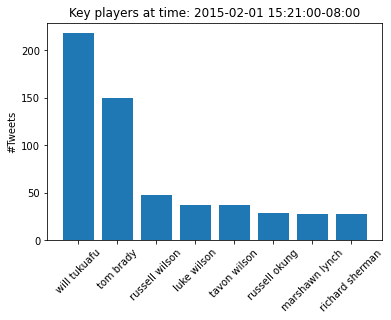


----- Summary of tweets for given Key moment for will tukuafu ---- 
 
Vote now for your favorite team in superbowlxlix.. superbowl 2015 is on tonight at 8pm ET.. i predict will cash in his briefcase in tonight superbowl.

----- Summary of tweets for given Key moment for tom brady ---- 
 
tom brady is the captain of the patriots. The newenglandpatriots are the champions of the new england clam chowder.. New England Patriots take on seattle seahawks in superbowl. Fans supporting the patriots because Tom brady was in a family guy episode superbowlxlix.. The game is on patriots to win really close game seahawks defence to be unbelievable but brady makes his chances count superbowlxlix.

----- Summary of tweets for given Key moment for russell wilson ---- 
 
It's all from houston ne danny amendola brandon lafell michael bennett cameron fleming sea russell okung david king superbowl sb49 nfl.. russell wilson is super cute. I'm thirsty for superbowl superbowlxlix.. the social media geek in m

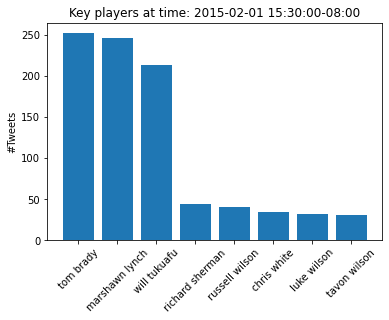


----- Summary of tweets for given Key moment for tom brady ---- 
 
How much of a steal at 199 6th round was tom brady?. am i the only one that thinks tom brady is not at all attractive his kinda basic superbowlxlix.. tom brady is a great leader who could still win even if spud webb was his only wide receiver superbowl sb49.

----- Summary of tweets for given Key moment for marshawn lynch ---- 
 
marshawn lynch is eating his skittles superbowlxlix.. marshawnlynch eating before superbowl. marshawn lynch beastmode powered by a merchant superbowl.. My favorite part about marshawn lynch when not trucking dudes on the field he looks like a guy pretending to be marshawn Lynch superbowl.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
superbowlxlix will be a nail biting commentary on the footballs deflategate.. i know absolutely nothing about nfl but seattle seahawks will win superbowl seavsne superbowlxlix.. It is estimated over 110 million people will be watching the 

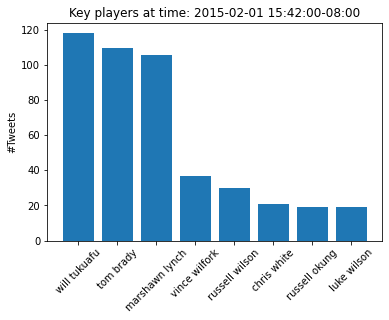


----- Summary of tweets for given Key moment for will tukuafu ---- 
 
Tom Brady in a swerve will leg drop ron gronkowski and form the new football order with roger goodell superbowl.. If they spelt defence wrong heads will roll for that one superbowl.. After 5 minutes play literally nothing has happened will anything actually happen superbowl handegg.

----- Summary of tweets for given Key moment for tom brady ---- 
 
Tom brady will leg drop ron gronkowski and form the new football order with roger goodell superbowl.. Tom brady patriots superbowl.  tom brady isajerk superbowlxlix freehernandez imonlyhereforthecommercials.  i don t follow football but i do love the superbowl seattle ftw cuz i like their coach s vibe more and cuz brady is too good looking.  fuck you wilson especially tom hanks volleyball superbowl.. Let s go brady err again superbowlxlix. Let s go pats.

----- Summary of tweets for given Key moment for marshawn lynch ---- 
 
i wonder how 2000 team would have handled mar

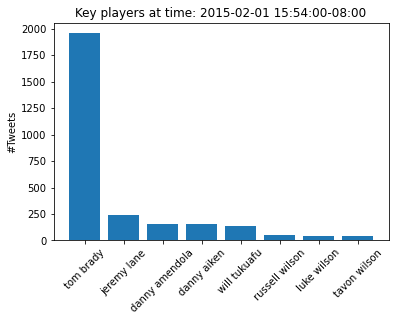


----- Summary of tweets for given Key moment for tom brady ---- 
 
tom brady threw that last one too low too much air in the ball perhaps superbowlxlix deflatriots.. New England hasn't scored a point in the 1st quarter in any of brady s super bowls superbowlxlix. brady cant throw nuttin with those little girl hands and a properly inflated ball superbowl tombrady deflategate seahawkswin.. the ball must not feel right to brady superbowl nevssea.

----- Summary of tweets for given Key moment for jeremy lane ---- 
 
jeremy lane picks off tom brady at the goal line sb49 superbowlxlix.. Jeremy lanes just won superbowl mvp. well played rt.. Great play by jeremy lane superbowlxlix.

----- Summary of tweets for given Key moment for danny amendola ---- 
 
danny trejo and steve buscemi marshamarshamarsha superbowl.. Snickers commercials are the bees knees superbowlxlix snickers.. The snickers commercial w danny trejo and steve buscemi is hilarious hewitt superbowl.

----- Summary of tweets for g

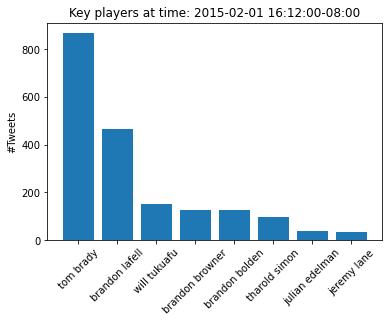


----- Summary of tweets for given Key moment for tom brady ---- 
 
Tom brady and the patriots superbowl.  touchdown on a pass by brady to lafell superbowl patsnation.. This one is in my top 3 right now snickers the brady bunch ads superbowl brandbowl.. i quite fancy tom brady superbowl.  touchdown new england brady to lafell thats what i am talking about brady lafell newenglandpatriots superbowl superbowlxlix sb49.

----- Summary of tweets for given Key moment for brandon lafell ---- 
 
brady gt lafell touchdown pats lead 7 0 midway through q2 superbowl.  on lafell td great route hard stick settles down before reaching safety perfection superbowlxlix.. Lsu alumni brandon lafell got the first touchdown in the superbowl.. patriots strike first brady lafell 7 0 superbowlxlix. The pats take a 7 0 lead over the seahawks.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
It's great now technically illiterate people will try to improve their internet by pouring coke on t

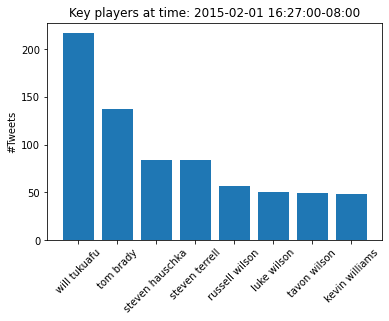


----- Summary of tweets for given Key moment for will tukuafu ---- 
 
everything will kill you nothing is safe except coca cola superbowl.. i will scream if i see one more depressing insurance comp commercial sb49 superbowlxlix. that comercial about the kid who will never do stuff is dark as hell superbowl wtf why.. Super Bowl commercials will feature funny ads for anti depressants well played big pharma.

----- Summary of tweets for given Key moment for tom brady ---- 
 
Tom Brady is in his 6th super bowl and win or lose he s sleeping next to gisele tonight.. tom brady is the man patriotswin superbowlxlix. tom brady can t throw these properly inflated balls superbowl sb49 sb49smchat. go england bora poxa tom brady first td e seahawkes so olhando cade wilson.. tom brady throws the same short passes man up no zone needed superbowlxlix.

----- Summary of tweets for given Key moment for steven hauschka ---- 
 
What died on steven tyler s face superbowl.. i m glad steven tyler is enjoying

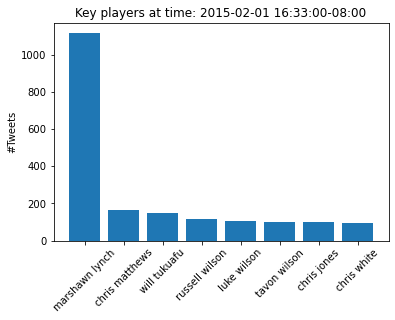


----- Summary of tweets for given Key moment for marshawn lynch ---- 
 
lynch leads the NFL in touchdowns with 51.. patriots and seahawks tied 7 7 late in the 2nd quarter of superbowl xlix. lynch td 7 7 superbowlxlix nesea. marshawn lynch for seattle score 24-24.. lynch is a beast beastmode superbowlxlix.

----- Summary of tweets for given Key moment for chris matthews ---- 
 
chris matthews catches his first career catch in superbowl.. superbowlxlix. how did matthews catch that under so much pressure.. yeah you love man on man don't you chris collinsworth superbowlxlix.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
This year will be known as the boohoobowl sadcommercials superbowlxlix.. 2nd half will be intense blood is boiling superbowlxlix.. i honestly want the patriots to win just so will perform a song naked at a show superbowl.

----- Summary of tweets for given Key moment for russell wilson ---- 
 
superbowlxlix.  out of nowhere seattle has a td wilson 

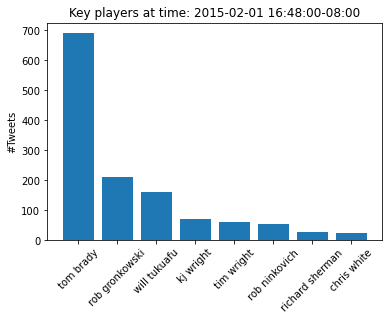


----- Summary of tweets for given Key moment for tom brady ---- 
 
Brady to gronk for another touchdown earthquakespike to boot 14 7 patriotsvsseahawks superbowlxlix.. superbowl. patriotswin patriotsvsseahawks superbowlxlix superbowl2015.. superbowl super pass by brady touchdown 14 7 pats lead.  brady to gronk finally touchdown superbowlxlix.

----- Summary of tweets for given Key moment for rob gronkowski ---- 
 
rob gronkowski puts the pats into the lead just before ht ne 14 7 seattle gronknation superbowlxlix.  i think gronkowski s arm is the same size as my leg superbowl.  gronk robgronkowski nice touchdown.. Brady to gronkowski touchdown superbowl.  touchdown of gronkowski ne patriots 14 7 seattle seahawks 2nd quarter 0 31 superbowlxlix.  14 7 new england patriots robgronkowski superbowl.. Gronkowski with the touchdown gronknation superbowl.  tom amp rob a deathly combination of boom and boom touchdown superbowlxlix patsnation.  and there s gronkowski doing what he does patriots 

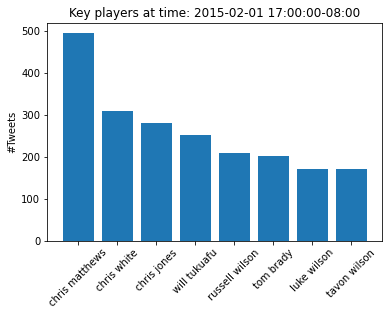


----- Summary of tweets for given Key moment for chris matthews ---- 
 
chris matthews is playing hardball superbowl sb49.. What a great game superbowlxlix goseahawks russellwilson chrismatthewsiskillingit.. who is chris matthews he ll be trending soon enough superbowl seahawks. matthews makes a touchdown that ties it all up 14 14 superbowlxlix.

----- Summary of tweets for given Key moment for chris white ---- 
 
ok al and chris pump the breaks on the chris matthews hype superbowl.. chris matthews has been fantastic today superbowl.. chris matthews is going to be drowning in pussy tonight superbowl. The patriots defense look like little league of football superbowlxlix seahawks.

----- Summary of tweets for given Key moment for chris jones ---- 
 
What are the vegas odds of chris mathews being super bowl mvp superbowl superbowlxlix.. Raiders have offered a five year deal to chris matthews superbowlxlix. If you go to superbowl.com, you can find out more about chris Matthews amp amp.. 

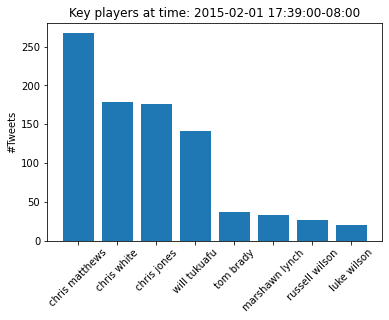


----- Summary of tweets for given Key moment for chris matthews ---- 
 
chris matthews just proves that seattle s scouting department is unreal superbowlxlix.. seahawks up 17 14 thanks to catch by chris matthews superbowlxlix.. i mean chrismatthews who knew he had hands like that superbowl.

----- Summary of tweets for given Key moment for chris white ---- 
 
rt chris matthews last 100 yard receiving game was on october 16 2010 with the kentucky wildcats. Chris matthews deserves everything he s got coming towards him rn superbowlxlix superbowlmVP.. Chris matthews is a beast superbowl seahawkswin superbowlxlix kingvaith. chris matthews having a david tyree game so far superbowl.. Was chris matthews stint at foot locker before or after he was named cfl rookie of the year sb49 superbowl nfl seahawks patriots.

----- Summary of tweets for given Key moment for chris jones ---- 
 
The chris matthews story is coming to a theater near you in 2015 superbowlxlix.. Chris matthews is on pace to b

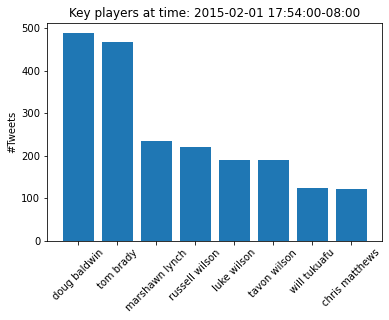


----- Summary of tweets for given Key moment for doug baldwin ---- 
 
touchdown seahawks by doug baldwin pat is good 24 14 seattle.  baldwin anota y seattle se ponen 10 arriba patriots 14 24 seahawks superbowlxlix.. doug baldwin scores for seattle with an end zone catch seahawks lead 24 14 superbowlxlix. baldwin just did the randy moss moon td celebration joe buck is disgusted superbowl. baldwin got a stupid penalty after the td by baldwin.. The official set a pick on that td to baldwin no one can convince me that the seahawks earmed this lead superbowlxlix.

----- Summary of tweets for given Key moment for tom brady ---- 
 
tom brady does it again with an interception superbowlxlix.. If your tom brady now would probably be a good time to deflate some balls superbowl.. Tom Brady throws two interceptions in Super Bowl XLIX.

----- Summary of tweets for given Key moment for marshawn lynch ---- 
 
i m just here to get a second ring seattleseahawks superbowlxlix 12thman nfl marshawnlynch.

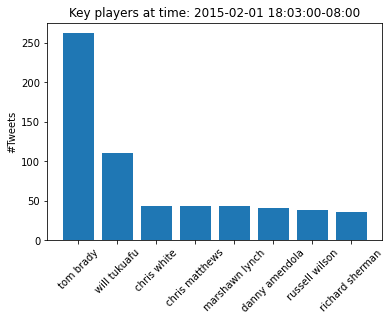


----- Summary of tweets for given Key moment for tom brady ---- 
 
i m frustrated for tom brady right now cause what the hell superbowlxlix.  let s discuss brady s ruby red slippers superbowl.  waits for tom Brady s bitchbaby cry spell to happen superbowl.. Tom brady can t seem to handle his balls superbowlxlix.. tom brady having a shocking third quarter sb49 superbowlxlix.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
i will be talkin superbowlcommercials ya know real hard hittin stuff.. should matthews win the mVP he will join teammate malcolm smith with the who are you award superbowl mVP seahawks chrismatthews nfl.. you will never have moves like these shark superbowl.

----- Summary of tweets for given Key moment for chris white ---- 
 
Chris matthews plays hardball for the seahawks.. i didn t get to see the walter white commercial but did see the toe fungus one superbowlxlix.. Chris Collinsworth is clearly rooting against the pats throughout the entire p

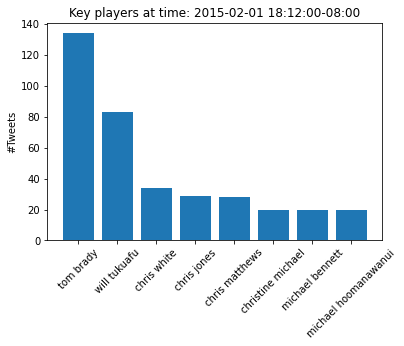


----- Summary of tweets for given Key moment for tom brady ---- 
 
When do we start the manning gt brady convo again vols superbowl.. tom brady has no confidence in passing over 20 yards superbowlxlix.. Tom brady s crying and the hawks are flying superbowlxlix.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
Will the real katy perry stand up superbowl?. No matter what the result the media will shit itself talking about how accurate tom terrific is.. Did superbowl just pay themselves 2 million for that ad and if it results in a profit will they finally lose their non profit status.

----- Summary of tweets for given Key moment for chris white ---- 
 
All football aside i think land sharks cars driving sideways and emotional white dads are the real winners today.. rt just spent the entire super bowl halftime explaining to my white friends who missy elliot is superbowl truedat funnyshit.. i m still going for chris jones and the bgsu gopatriots superbowlxlix.

-----

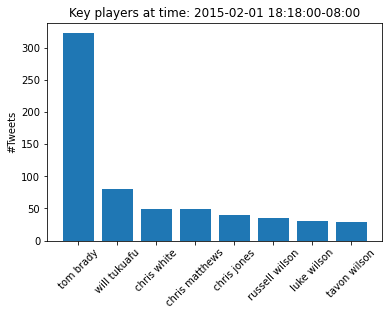


----- Summary of tweets for given Key moment for tom brady ---- 
 
tom brady is in ted 2 if he loses we know why superbowl superbowlcommercials ted2.. tom brady s best pass in the second half was during that ted 2 ad superbowl.  ok that ted commercial feat tom brady win superbowl.  maybe tombrady should spend a little less time acting superbowl sbcommercials adbowl.. So so tom brady is griping about stuffed bears like it was the afc championship game superbowlxlix.

----- Summary of tweets for given Key moment for will tukuafu ---- 
 
Russle wilson says the seahawks will win the superbowl.. No halftime show will ever top this one superbowl.. How we will remember superbowlxlix the year the superglue and fanny packs became in style superbowl.

----- Summary of tweets for given Key moment for chris white ---- 
 
The bluebombers are getting no credit for this chris matthews guy startedfrombottom.. The most successful ad during superbowl hard ball with chris mathews. walter white is back w

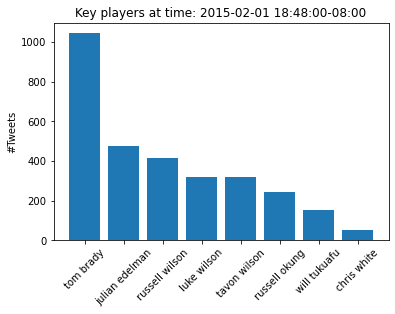


----- Summary of tweets for given Key moment for tom brady ---- 
 
Tom Brady leads the Patriots to a 28-24 win over the Seahawks. Patriots fans are chanting " tom freaking brady superbowlxlix". Julian Edelman touchdown puts patriots ahead 28-24. Tom brady throws another clutch touchdown pass.. Two minutes to the endless glory superbowlxlix.

----- Summary of tweets for given Key moment for julian edelman ---- 
 
Julian edelman's touchdown pass to my favorite guy edelman majoranxiety letsgopats superbowlxlix.. tharold simon leaden footed as brady finds edelman to make it 28 24 superbowl.. New England Patriots take 28-24 lead over Seattle Seahawks in 4th quarter. Julian Edelman catches a touchdown pass with 2 02 left to give pats the lead.

----- Summary of tweets for given Key moment for russell wilson ---- 
 
Super Bowl XLIX is on Sunday night at 8 p.m. ET. Super Bowl XLVIII is on Monday night at 8:30 p.m., ET.. Can russell wilson throw seahawks down the field when he has to throw gre

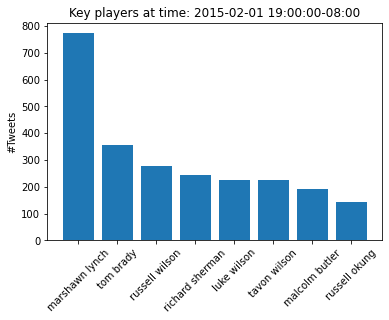


----- Summary of tweets for given Key moment for marshawn lynch ---- 
 
i can t believe they didn t give that ball to marshawn lynch superbowl.. Why would you throw it instead of giving it to marshawn lynch superbowl.. lynch is unstoppable brainfart.  i wouldn t have run lynch either stupid call beastmode superbowlxlix.

----- Summary of tweets for given Key moment for tom brady ---- 
 
aww what s the matter tom you mad or nah haha superbowlxlix.. Tom brady wins his 4th super bowl ring.. Tom brady gets his 4th ring superbowlxlix superbowlchampions. tom brady deserved that champ superbowlXlix.

----- Summary of tweets for given Key moment for russell wilson ---- 
 
There s a joke here about wilson and his god and where is he now?. daaaaaaamnnnnnnnn russell wilson is the new tony romo chockedout superbowlxlix.. If the offensive coordinator made that call he should be fired if russell wilson made it there s always next year nfl superbowl.

----- Summary of tweets for given Key moment for

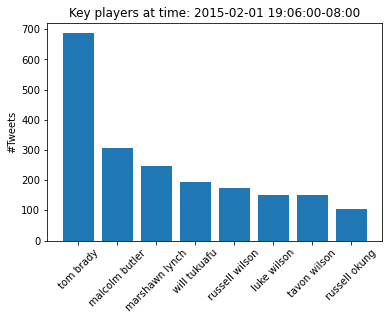


----- Summary of tweets for given Key moment for tom brady ---- 
 
12 tom brady superbowlxlix 4superbowlrings. tom brady goat.. Sportworld and sportworld.com are the official public broadcasters of the european netherlands network.. "What a gaaame congrats patriots. What a sexy tombrady"

----- Summary of tweets for given Key moment for malcolm butler ---- 
 
Butler won it for the guys man patriots superbowlxlix. malcom butler ihatethepatriots seahawksaresorelosers superbowl. Butler you re the real mvp superbowl patriots.. Newenglandpatriots win superbowl 49-17 over patriots. malcom butler is the mvp of the superbowl isn't he? ifmalcom butler gets mVP i m out superbowl patriots.. There s a ring on revisisland thanks malcolm butler superbowlxlix nevssea.

----- Summary of tweets for given Key moment for marshawn lynch ---- 
 
you all know why we passed the ball marshawn lynch superbowl superbowlxlix.. i can t believe they called a pass play with lynch in the backfield bad move carroll 

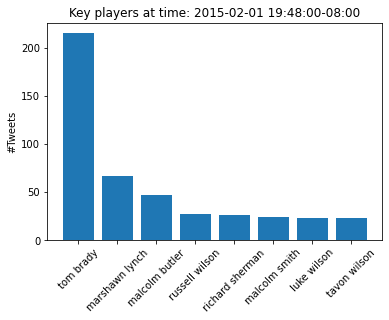


----- Summary of tweets for given Key moment for tom brady ---- 
 
we are the champions come to next superbowl tom brady is a deus.. justinbieber bullseye tombrady superbowl.. "This tom brady gif is everything sb49 superbowl" "Justinbieber bullseye tombrady superbowl"

----- Summary of tweets for given Key moment for marshawn lynch ---- 
 
We had fun tweeting with y all everybody thinks lynch should have gotten the ball but hindsight is 20 20.. Had to repost marshawn superbowl2015 seahawks.. marshawn lynch looking at pete carroll right now like seattleseahawks superbowl pats.

----- Summary of tweets for given Key moment for malcolm butler ---- 
 
malcolm butler won the superbowl for the patriots. The butler is a classy player.. Butler's interception won the superbowl for the patriots. But dez b catch didn t count huh karma bitches patriotswin superbowlxlix patriots malcolmbutler.. The butler did it interception of the decade superbowl superbowlxlix gopatriots patriotsvsseahawks. dest

In [349]:
keyTimesGP = tsgopatriots
keyTimesGH = tsgohawks
keyTimesSB = tssb

fullroster = list(set.union(set(PatriotsRoster), set(hawksRoster)))
for id, tw in enumerate(twsb):
    mp = getAssociatedPlayers(tw, fullroster)
    top = list(mp.keys())[0:8]
    
    values = []
    for tp in top:
        values.append(mp[tp])
    
    plt.bar(top, values)
    plt.xticks(rotation = 45)
    plt.title("Key players at time: {}". format(keyTimesSB[id]))
    plt.ylabel("#Tweets")
    plt.show()
    
    for tp in top:
        print("\n----- Summary of tweets for given Key moment for {} ---- \n ".format(tp))
        print(getKeyTweets(tw, tp))

## Part 5 Fanbase Prediction

For this part I have predicted the state from which a tweet has been made. Only two states : Washington and Massachusetts are considered. The hashtag data used for this is the #superbowl as it contains all the tweets from supporters, rivals and neutral people. 

While loading the tweets and data, tweets which are having location tweet['user']['location'] are only considered. The results were further filtered by taking only tweets with language as 'english'.

The location given is not per any standard norm and thus, to get the states to which a location belongs, I used a python library "geonamecache", from which we got the state corresponding to a city and also have written a simple filter to determine the state given the location. 

Only WA and MA states are kept.

We are left with total : 

MA -    16574 <br>
WA -    15784, datapoints.

Out of these 20% were kept aside for testing and 80% are used for training. 

To build the features from the text, I used TFIDF representation of each word in a tweet. A pipeline with stopword removal, lemmatization, digit removal was used, given the tweets have already gone through a level of cleaning earlier as they were loaded from file.

Thus there are 6340 features per data point which is too much given low number of samples.

I used TruncatedSVD to reduce the number of features. Explained variance plot helped in deciding the number to choose. 
We kept 200 components thus 6340 features are reduced to 200 components and 40 % of variance is retained. 

The classes are evenly distributed and there is not such class imbalance.

Two classifiers are used to predict the two classes.

<b>Logistic regression. <br>
Support Vector Classifier.<br></b>

Search Params for Logistic Regression:<br>
C: [10^-4, 10^4] <br>
penalty: [l1, l2, elasticnet] , elasticnet is a combination of l1 and l2<br>

Search Params for SVC:<br>
C: [1, 10, 100, 1000, 0.1, 0.01, 0.001]<br>
penalty: [l1, l2] , elasticnet is a combination of l1 and l2<br>
loss: ['hinge', 'squared_hinge']<br>

GridSearchCV with a k-fold of 5 is used to search the hyperparameters.

Best Logistic Regression had params: l1, C = 1.0<br>
Best test accuracy: 0.7456736711990112

<b>Scores:</b> <br>
accuracy: 0.7469097651421508<br>
recall: 0.7421999372997606<br>
precision: 0.7719416369220731<br>
f1_score: 0.7383590910127489<br>


Best SVC had params: l2, C = 100, loss = 'squared_hinge'<br>
Best test accuracy: 0.7469097651421508

<b>Scores:</b>

accuracy: 0.7469097651421508<br>
recall: 0.7421999372997606<br>
precision: 0.7719416369220731<br>
f1_score: 0.7383590910127489<br>


The confusion matrices and ROC with AUC for both of the classifiers are plotted below. <br>
The AUC for both of them is 0.84 which is average performance.<br>
Also there are a lot of misclassifications but SVC seems to performs slightly better compared to Logistic Regression.

All #superbowl tweets are loaded but only considering english ones as they can be analysed and segregated.

In [352]:
superbowlEN = superbowl[superbowl['lang'] == 'en']

In [355]:
superbowlEN['lang'].value_counts()

en    949540
Name: lang, dtype: int64

#### Total dataset : 949540

In [364]:
gc = geonamescache.GeonamesCache()

In [385]:
# 'countrycode': 'US'
# 'admin1code': 'MA'
#  'admin1code': 'WA'
#  countrycode': 'US'

cityKeys = list(gc.get_cities().keys())

cities = gc.get_cities()

WACities = []
MACities = []

for key in cityKeys:
    city = cities[key]
    if city['countrycode'] == 'US' and city['admin1code'] == 'MA':
        MACities.append(city['name'].lower())
    elif city['countrycode'] == 'US' and city['admin1code'] == 'WA':
        WACities.append(city['name'].lower())

In [413]:
def isWACity(loc):
    if loc.lower() in WACities:
        return 'WA'
    if " WA" in loc or ("Washington" in loc and "DC" not in loc and "D.C." not in loc):
        return 'WA'
    return False

def isMACity(location):
    if location.lower() in MACities:
        return 'MA'
    if " MA" in location or "Massachusetts" in location:
        return 'MA'
    return False

def isWAMA(location):
    x = isWACity(location)
    y = isMACity(location)
    return x or y


In [416]:
superbowlEN['location'] = superbowlEN['location'].apply(lambda x: isWAMA(x))

/var/folders/vz/klhnj80n0ldfrc97mb312d9c0000gn/T/ipykernel_99659/4055058753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superbowlEN['location'] = superbowlEN['location'].apply(lambda x: isWAMA(x))


In [423]:
superbowlEN = superbowlEN[(superbowlEN['location'] == 'WA') | (superbowlEN['location'] == 'MA')]

In [472]:
superbowlEN['location'].value_counts()

MA    16574
WA    15784
Name: location, dtype: int64

In [473]:
def getSVD(n_comp, data):
    SVD = TruncatedSVD(n_components=n_comp, random_state=42)
    SVD.fit(data)
    return SVD

In [477]:
totalData = superbowlEN[['tweet', 'location']]

In [517]:
totalData['location'].value_counts()

MA    16574
WA    15784
Name: location, dtype: int64

#### Classes are evenly distributed. No class imbalance

In [478]:
x_train, x_test, y_train, y_test = train_test_split(totalData['tweet'],
                                                    totalData['location'], test_size=0.20, random_state=42)


print("--------- Train data Size: {}, Test data Size: {} ---------".format(len(x_train), len(x_test)))

--------- Train data Size: 25886, Test data Size: 6472 ---------


In [479]:
CV = vectorizer2(min_df=3)

featurePipeline = Pipeline([
    ('count', CV),
    ('tfidf', TfidfTransformer(smooth_idf=True, use_idf=True))
]).fit(x_train)

In [480]:
train_tfidf = featurePipeline.transform(x_train)
test_tfidf = featurePipeline.transform(x_test)

In [481]:
features = len(featurePipeline['count'].get_feature_names_out())
print("Total features: ", features)

Total features:  6340


In [482]:
n_components = 1000
SVD = getSVD(n_components, train_tfidf)

Text(0, 0.5, 'Varaince retained')

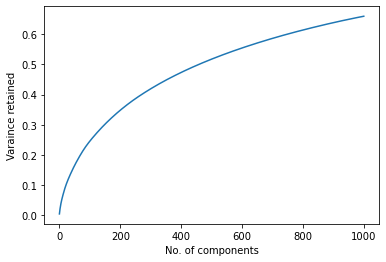

In [483]:
plt.plot(np.arange(1000), np.cumsum(SVD.explained_variance_ratio_))
plt.xlabel("No. of components")
plt.ylabel("Varaince retained")

#### Choosing n_components for SVD = 200

In [484]:
n_components = 200
SVD = getSVD(n_components, train_tfidf)

In [485]:
train_tfidf = SVD.transform(train_tfidf)
test_tfidf = SVD.transform(test_tfidf)

In [491]:
gridSearchLR = Pipeline([
    ('clf', LogisticRegression(penalty='l1', C = 0.1, random_state=42, solver='saga'))
])

params_LR = {
    'clf__C': [10.0**x for x in np.arange(-4,4)],
    'clf__penalty': ['l1', 'l2', 'elasticnet']
}

In [492]:
grid_LR = GridSearchCV(gridSearchLR, param_grid=params_LR, cv=5, verbose=0, n_jobs=-1, 
                     scoring='accuracy').fit(train_tfidf, y_train)

/Users/gauravsingh/miniforge3/envs/tf_metal/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gauravsingh/miniforge3/envs/tf_metal/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gauravsingh/miniforge3/envs/tf_metal/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/gauravsingh/miniforge3/envs/tf_metal/lib/python3.8/site-

In [495]:
LRdf = pd.DataFrame(grid_LR.cv_results_)

In [497]:
LRdf.sort_values(by=['mean_test_score'], ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.922411,0.023527,0.009702,0.001869,1.0,l1,"{'clf__C': 1.0, 'clf__penalty': 'l1'}",0.746620,0.751787,0.743288,0.737686,0.750048,0.745886,0.005033,1
13,0.622578,0.016123,0.008529,0.002054,1.0,l2,"{'clf__C': 1.0, 'clf__penalty': 'l2'}",0.748552,0.749082,0.740583,0.739231,0.748503,0.745190,0.004339,2
15,0.933091,0.040893,0.006924,0.002220,10.0,l1,"{'clf__C': 10.0, 'clf__penalty': 'l1'}",0.746234,0.748117,0.743867,0.739231,0.748117,0.745113,0.003330,3
21,1.196668,0.224109,0.008216,0.001949,1000.0,l1,"{'clf__C': 1000.0, 'clf__penalty': 'l1'}",0.746620,0.746185,0.744253,0.739424,0.746571,0.744611,0.002734,4
18,1.189828,0.193706,0.007705,0.001973,100.0,l1,"{'clf__C': 100.0, 'clf__penalty': 'l1'}",0.746427,0.746185,0.744060,0.739038,0.746765,0.744495,0.002888,5


###### Using best logistic regression model

In [505]:
clfLR = LogisticRegression(penalty='l1', C = 1.0, random_state=42,
                           solver='saga')

predsLR = clfLR.fit(train_tfidf, y_train).predict(test_tfidf)

In [506]:
print("Test accuracy Logistic regression: ", accuracy_score(y_test, predsLR))

Test accuracy Logistic regression:  0.7456736711990112



---------Scores for Logistic Classifier Classifier-------
accuracy: 0.7456736711990112
recall: 0.7413389559645515
precision: 0.766136376284409
f1_score: 0.7382772392430639

---------Confusion Matrix for Logistic Classifier-------


/Users/gauravsingh/miniforge3/envs/tf_metal/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


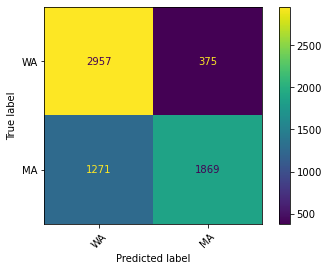

/Users/gauravsingh/miniforge3/envs/tf_metal/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


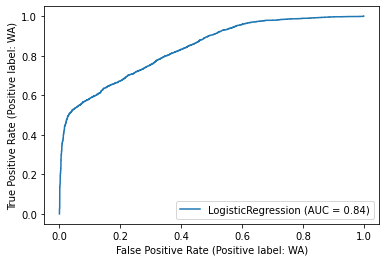

In [514]:
print("\n---------Scores for Logistic Classifier Classifier-------")
print('accuracy:', accuracy_score(y_test, predsLR))
print('recall:', recall_score(y_test, predsLR, average='macro'))
print('precision:', precision_score(y_test, predsLR, average='macro'))
print('f1_score:', f1_score(y_test, predsLR, average='macro'))

print("\n---------Confusion Matrix for Logistic Classifier-------")
plot_confusion_matrix(clfLR, test_tfidf, y_test, display_labels=['WA', 'MA'], xticks_rotation=45)
plt.show()

metrics.plot_roc_curve(clfLR, test_tfidf, y_test)
plt.show()

In [524]:
gridSearchSVC = Pipeline([
    ('clf', LinearSVC(penalty='l1', C = 1.0, loss='hinge', random_state=42))
])

params_SVC = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [1, 10, 100, 1000, 0.1, 0.01, 0.001],
    'clf__loss': ['hinge', 'squared_hinge']
}

In [525]:
grid_SVC = GridSearchCV(gridSearchSVC, param_grid=params_SVC, cv=5, verbose=0, n_jobs=-1, 
                     scoring='accuracy').fit(train_tfidf, y_train)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/Users/gauravsingh/miniforge3/envs/tf_metal/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gauravsingh/miniforge3/envs/tf_metal/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gauravsingh/miniforge3/envs/tf_metal/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/gauravsingh/miniforge3/envs/tf_metal/lib/python3.8/site-

In [526]:
svcDf = pd.DataFrame(grid_SVC.cv_results_)

In [533]:
svcDf.sort_values(by=['mean_test_score'], ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__loss,param_clf__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,22.380470,0.015246,0.007444,0.000741,100,squared_hinge,l2,"{'clf__C': 100, 'clf__loss': 'squared_hinge', ...",0.749517,0.746958,0.743288,0.738459,0.748503,0.745345,0.004041,1
19,0.393187,0.008924,0.009970,0.002983,0.1,squared_hinge,l2,"{'clf__C': 0.1, 'clf__loss': 'squared_hinge', ...",0.746620,0.749469,0.739618,0.739231,0.751014,0.745190,0.004916,2
3,1.250756,0.022116,0.010972,0.002083,1,squared_hinge,l2,"{'clf__C': 1, 'clf__loss': 'squared_hinge', 'c...",0.747007,0.748310,0.740390,0.739231,0.747537,0.744495,0.003865,3
7,10.246660,1.862731,0.007923,0.002067,10,squared_hinge,l2,"{'clf__C': 10, 'clf__loss': 'squared_hinge', '...",0.747586,0.746958,0.741163,0.739038,0.747151,0.744379,0.003563,4
9,8.673261,0.092264,0.009232,0.002069,100,hinge,l2,"{'clf__C': 100, 'clf__loss': 'hinge', 'clf__pe...",0.747779,0.748696,0.738845,0.739811,0.744833,0.743993,0.004029,5


In [534]:
clfSVC = LinearSVC(penalty='l2', C = 100, loss='squared_hinge', random_state=42)

predsSVC = clfSVC.fit(train_tfidf, y_train).predict(test_tfidf)

/Users/gauravsingh/miniforge3/envs/tf_metal/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [535]:
print("Test accuracy SVC classifier: ", accuracy_score(y_test, predsSVC))

Test accuracy SVC classifier:  0.7469097651421508



---------Scores for Logistic Classifier Classifier-------
accuracy: 0.7469097651421508
recall: 0.7421999372997606
precision: 0.7719416369220731
f1_score: 0.7383590910127489

---------Confusion Matrix for Logistic Classifier-------


/Users/gauravsingh/miniforge3/envs/tf_metal/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


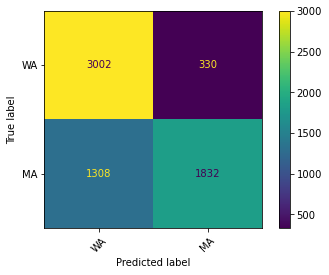

/Users/gauravsingh/miniforge3/envs/tf_metal/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


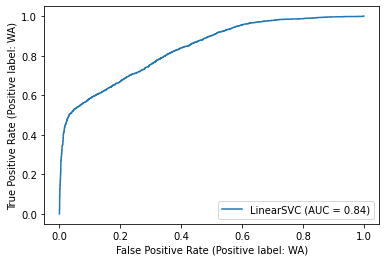

In [536]:
print("\n---------Scores for Logistic Classifier Classifier-------")
print('accuracy:', accuracy_score(y_test, predsSVC))
print('recall:', recall_score(y_test, predsSVC, average='macro'))
print('precision:', precision_score(y_test, predsSVC, average='macro'))
print('f1_score:', f1_score(y_test, predsSVC, average='macro'))

print("\n---------Confusion Matrix for Logistic Classifier-------")
plot_confusion_matrix(clfSVC, test_tfidf, y_test, display_labels=['WA', 'MA'], xticks_rotation=45)
plt.show()

metrics.plot_roc_curve(clfSVC, test_tfidf, y_test)
plt.show()